# Grup 2 - Bad Loan Prediction

![alt text](https://i.imgyukle.com/2020/04/10/QQbprG.jpg)

# Özet: 

-Bu veri bilimi çalışmasının amacı, bir bankanın veri setini kullanarak hangi müşterilere kredi vermenin riskli olup olmadığını en isabetli biçimde tahmin eden algoritmaları incelemek ve buna göre kredi verilmesi riskli olan müşteri profilini tespit etmektir.​

-Bu bağlamda ilk olarak, binary bağlı değişken ve 50 bağımsız değişkenden oluşan verinin eksik değerleri incelenmiş ve ilgili yöntemlerle doldurulmuştur.​

-Devamında bazı makine öğrenmesi algoritmaları veriler ile eğitilip test edilmiştir.​ 

-Bu algoritmalara göre riskli müşteri portföyü belirlenmesine en çok etki eden faktör, müşterinin kredi notu olarak tespit edilmiştir. ​

-Bunun yanında kredi kartı limiti, ek hesap limiti, eğitim durumu gibi faktörler de riskli grubun belirlenmesi için önemlidir.​

-Algoritmalardan XGBoost, random forest ve logistic regression birbirine yakın sonuçlar vermiş, gradient boosting classifier diğerlerinden biraz daha yüksek test isabet oranı bulmuştur. 

# 1. Giriş

Bankalar geri ödeme sözü karşılığında kredi talep edene kredi sağlamaktadır. Bu durumda banka yalnızca kredi talep edenin krediyi ödemesi durumunda kar elde eder. Ancak, krediyi geri ödenmezse, yatırımcı para kaybeder. ​

Bu sebeple kredi sektöründe kritik iki soru vardır;​

- Kredi talep eden ne kadar risklidir?​

- Kredi talep edenin riski göz önüne alındığında, ona kredi vermeli miyiz?​

Bu risk analizini tespit etmek için kurduğumuz modelin amacı, standart bir süreçte kredi talep edenlerden alınan bilgileri kullanarak bu kimselerim geri ödeme yükümlülüklerini yerine getirip getirememe ihtimalinin hesaplanması ve en yüksek oranda doğru sonuçlar vermesidir.Bu tür bir modelle yatırımcıya, tahsilat gelirlerini üst düzeye çıkarıp işletme maliyetini en aza indirmesi hususunda destek verilecektir.İstenen modeli geliştirmek için kullanılan veriler, Türkiye kredi piyasasında aktif olan bir bankadan temin edilmiş, gerçek fakat anonimleştirilmiş verilerdir.

# 2. Veri ile ilgili bilgiler

Kullandığımız veri seti 5626 anonim müşterinin bilgilerini içermekte olup bir bağlı değişken ve 50 bağımsız değişkenden oluşmaktadır. Değişkenlerin 37'si nümerik, 13'ü ise kategorik değişkendir. 

- Kategorik veriler: 12 nominal, 1 ordinal
- Nümerik veriler: 10 kardinal, 27 continuous

Hedef değişken, müşterinin krediyi ödeme durumunu ifade eder. Hedef değişkenin 0 olması kredinin ödendiğini, 1 olması ise müşterinin krediyi ödeyemediği ve riskli kategoriye girdiğini göstermektedir. 


In [7]:
import numpy as np
import random
random.seed(2020)
np.random.seed(2020)
#%%
import pandas as pd
df = pd.io.excel.read_excel(r"C:\Users\orastak\Desktop\datasets\hocanındata.xls", sheet_name=0)
data_dict= pd.io.excel.read_excel(r"C:\Users\orastak\Desktop\datasets\hocanındata.xls", sheet_name=1)
data_dict=data_dict.rename(columns={"variable_name":"Variable"})
df=df.set_index("KEY")
df=df.drop_duplicates() # dropping dublicated rows
#%%
df.describe()
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())



Missing values :   39593

Unique values :  
 VAR_TARGET       2
VAR_1          552
VAR_2            4
VAR_3           64
VAR_4          701
VAR_5          534
VAR_6           18
VAR_7         1190
VAR_8         3570
VAR_9         2025
VAR_10         641
VAR_11          35
VAR_12          10
VAR_13         224
VAR_14         224
VAR_15         123
VAR_16           2
VAR_17          80
VAR_18         890
VAR_19          29
VAR_20          52
VAR_21          32
VAR_22           6
VAR_23           4
VAR_24         612
VAR_25         609
VAR_26           3
VAR_27           9
VAR_28          48
VAR_29         904
VAR_30        1741
VAR_31          48
VAR_32         681
VAR_33           1
VAR_34         154
VAR_35           5
VAR_36           2
VAR_37           6
VAR_38         410
VAR_39         115
VAR_40        1276
VAR_41        1381
VAR_42        1472
VAR_43          26
VAR_44        1402
VAR_45         224
VAR_46        1308
VAR_47        1461
VAR_48        1460
VAR_49         614
VAR_

Positive examples = 246
Negative examples = 5380
Proportion of positive to negative examples = 4.57%


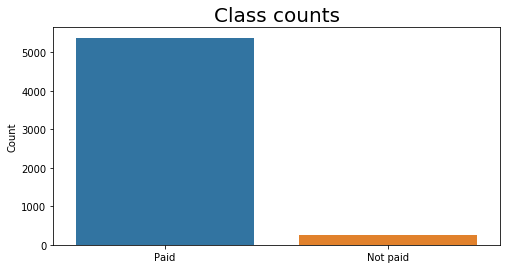

In [8]:
#X_train_final.to_pickle(r"C:\Users\orastak\Desktop\grup2\X_train_final.pkl")
#X_test_final.to_pickle(r"C:\Users\orastak\Desktop\grup2\X_test_final.pkl")
#X_train_final= pd.read_pickle(r"C:\Users\orastak\Desktop\grup2\X_train_final.pkl")
import matplotlib.pyplot as plt
import seaborn as sns
#------------------ Get number of positve and negative examples
pos = df[df["VAR_TARGET"] == 1].shape[0]
neg = df[df["VAR_TARGET"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 4))
sns.countplot(df["VAR_TARGET"])
plt.xticks((0, 1), ["Paid", "Not paid"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});
plt.show()

#plt.savefig(r"C:\Users\orastak\Desktop\grup2\target_ratio.png",dpi=300)

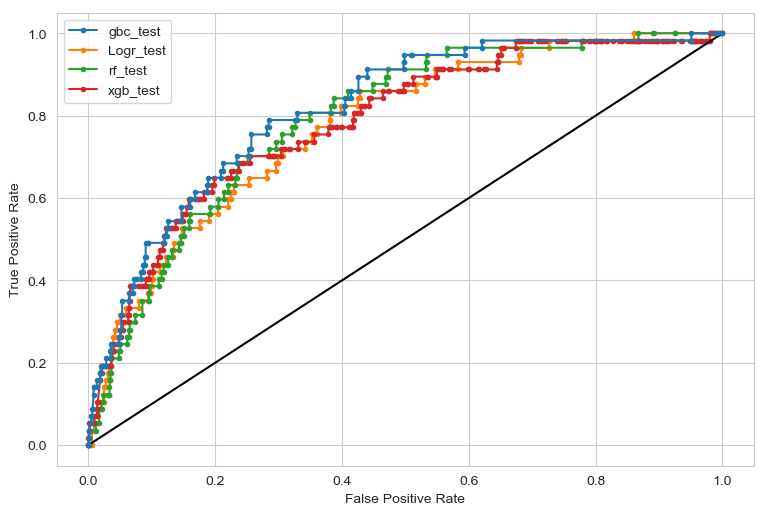

## Eksik veri ile ilgili bilgiler

In [9]:
#%%
df.describe()
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())
df.info()


Missing values :   39593

Unique values :  
 VAR_TARGET       2
VAR_1          552
VAR_2            4
VAR_3           64
VAR_4          701
VAR_5          534
VAR_6           18
VAR_7         1190
VAR_8         3570
VAR_9         2025
VAR_10         641
VAR_11          35
VAR_12          10
VAR_13         224
VAR_14         224
VAR_15         123
VAR_16           2
VAR_17          80
VAR_18         890
VAR_19          29
VAR_20          52
VAR_21          32
VAR_22           6
VAR_23           4
VAR_24         612
VAR_25         609
VAR_26           3
VAR_27           9
VAR_28          48
VAR_29         904
VAR_30        1741
VAR_31          48
VAR_32         681
VAR_33           1
VAR_34         154
VAR_35           5
VAR_36           2
VAR_37           6
VAR_38         410
VAR_39         115
VAR_40        1276
VAR_41        1381
VAR_42        1472
VAR_43          26
VAR_44        1402
VAR_45         224
VAR_46        1308
VAR_47        1461
VAR_48        1460
VAR_49         614
VAR_

# 3. Veri analizi

Bu bölümde ilk olarak, eksik değerlerin hangi yöntemlerle doldurulacağını gösteren tabloyu oluşturduk. Ardından veriyi eğitim ve test için ayırdık ve verinin eğitim kısmı için aykırı değerlerin veriden çıkarılması ve eksik değerlerin eklenmesi işlemlerini gerçekleştirdik. 

In [10]:
#%%
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    
    import psutil, os, gc, time
    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    entry_lenght_list = []
    variable_name_list = []
    total_entry_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []

    for col in df.columns:

        buf = io.StringIO()
        df[[col]].info(buf=buf)
        data_info = buf.getvalue().split('\n') #converting to a string object done
        entry_lenght = int(data_info[1].split(' ')[1])
        variable_name = data_info[3].split(' ')[0]
        total_entry = int(data_info[3].split('    ')[1].split(' ')[0])
        missing_value_number = entry_lenght - total_entry
        missing_value_ratio = round(float(missing_value_number/entry_lenght),4)
        data_type = data_info[3].split('    ')[1].split(' ')[2]

        number_of_unique_values = len(df[col].unique())
        unique_values = df[col].unique()

        entry_lenght_list.append(entry_lenght)
        variable_name_list.append(variable_name)
        total_entry_list.append(total_entry)
        missing_value_number_list.append(missing_value_number)
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(data_type)
        unique_values_list.append(unique_values)
        number_of_unique_values_list.append(number_of_unique_values)

    data_info_df = pd.DataFrame({'Variable': variable_name_list, '#_Total_Entry':total_entry_list,\
                                 '#_Missing_Value': missing_value_number_list,'%_Missing_Value':missing_value_ratio_list,\
                                 'Data_Type': data_type_list, 'Unique_Values': unique_values_list,\
                                 '#_Unique_Values':number_of_unique_values_list})
    
    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df

In [72]:
pd.set_option("display.max_columns",100) #in console it shows results up to 100 columns
data_info=MissingUniqueStatistics(df)
data_info=data_info.merge(data_dict[["Variable","Variable_Structure","variable_definition"]], how='left', on="Variable",left_index=True)
data_info=data_info.set_index("Variable")
data_info[["variable_definition"]]

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.00415645440419515 minutes ---


,variable_definition
Variable,
VAR_TARGET,Credit Performance
VAR_1,Age of Applicant
VAR_2,Application Channel
VAR_3,Branch City Code
VAR_4,Maximum Open Credit Card Limit
VAR_5,Minimum Open Credit Card Limit
VAR_6,Number of application in last 6 months
VAR_7,Total limit
VAR_8,Total Balance of All Credit Cards


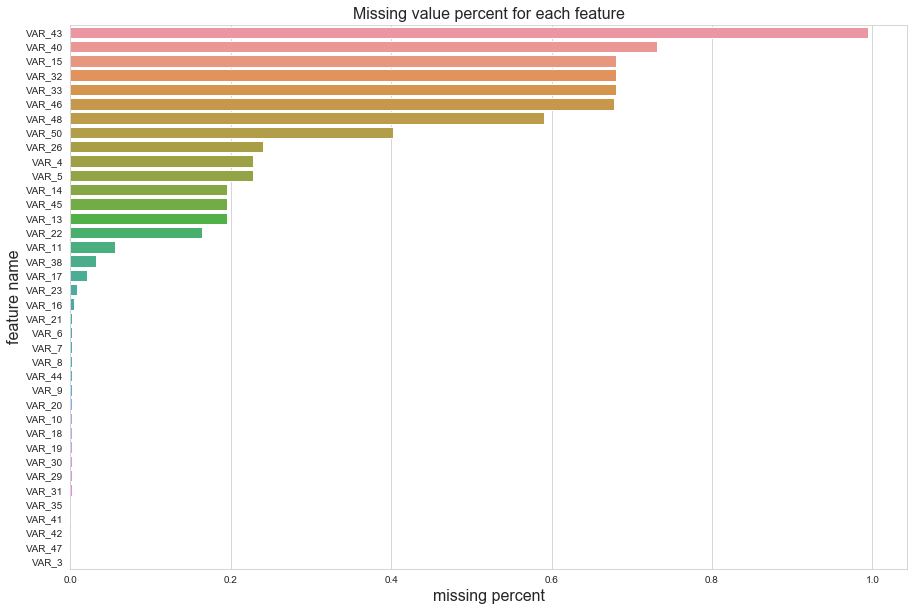

In [12]:
#%%# -----draw a graph of missing value percent of features(percent>0.00)
missing_data_count_show = data_info[data_info["%_Missing_Value"] > 0.00].sort_values(by=["%_Missing_Value"],ascending=False)
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=missing_data_count_show["%_Missing_Value"], y=missing_data_count_show.index, ax=ax)
ax.set_title("Missing value percent for each feature", fontsize=16)
ax.set_xlabel("missing percent", fontsize=16)
ax.set_ylabel("feature name", fontsize=16)
plt.show()
plt.close()


## Eğitim - test ayrımı

Verilerin yüzde 75'ini eğitim için ayırarak, eğitilen bu kısmın kalan yüzde 25'i ile test edilmesi planlandı. 

In [13]:
#%% create train test splited dataframes
x=df.iloc[:,1:]
y=df.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=101)
df_test=pd.concat([y_test,X_test], axis=1 ,sort=False)
df_train=pd.concat([y_train,X_train], axis=1 ,sort=False)
del x
del y
data_info_splited=MissingUniqueStatistics(df_train)  #creating missing values table of train dataset
data_info_splited=data_info_splited.merge(data_dict[["Variable","Variable_Structure","variable_definition"]], how='left', on="Variable",left_index=True)
data_info_splited=data_info_splited.set_index("Variable")

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.004530378182729085 minutes ---


In [14]:
#%%
# =============================================================================
# missing["imputation_type"]=[None]*missing.shape[0]  #creationg new empty columns
# missing["data_type"]=[None]*missing.shape[0]
# missing["skewness"]=[None]*missing.shape[0]
# =============================================================================
#categorising inputation types according to missing value percentage
data_info_splited.loc[data_info_splited.loc[:,'%_Missing_Value']<=0.06,'imputation_type']="simple"
data_info_splited.loc[(data_info_splited.loc[:,'%_Missing_Value']<=0.25) & (data_info_splited.loc[:,'%_Missing_Value']>0.06),'imputation_type']="tree based"
data_info_splited.loc[data_info_splited.loc[:,'%_Missing_Value']>0.25,'imputation_type']="model based"
numerical_columns = list(data_info_splited.loc[(data_info_splited.loc[:,"Variable_Structure"]=="Cardinal") |
        (data_info_splited.loc[:,"Variable_Structure"]=="Continuous-Ratio")].index)

Aykırı değerlerin incelenmesine geçmeden önce, veride varyansı sıfır olan nümerik değişkenleri ve 1'den fazla farklı değeri olmayan değişkenleri kontrol ettik. 

Verimizde iki örnekten de değişken bulunmamaktadır. 

In [15]:
#%%
# THIS METHOD IS DROPPING COLUMNS HAVING [nan,0.0] UNIQUE VALUES...WE SHOULD CONVERT THEM TO CATEGORIC!
def ZeroVarianceFinder(df, numerical_columns):
  
  import pandas as pd
  import numpy as np

  zerovariance_numerical_features=[]
  for col in numerical_columns:
      try:
          if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
          np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
              zerovariance_numerical_features.append(col)
      except:
          print("Error:",col)
  return zerovariance_numerical_features

In [16]:
zero_variance_numerical_features=ZeroVarianceFinder(df_train,numerical_columns)


In [17]:
#%% list categorical value columns that has single value 
categorical_columns = list(data_info.loc[(data_info.Variable_Structure=="Nominal") | (data_info.Variable_Structure=="Ordinal")].index)
def SingletonCategoricalFinder(df, categorical_columns):
    singleton_categorical_features=[]
    for col in categorical_columns:
        if len(df[col].unique()) <= 1:
            singleton_categorical_features.append(col)
    return singleton_categorical_features

singleton_categorical_features=SingletonCategoricalFinder(df_train,categorical_columns)

## Aykırı değerlerin düzenlenmesi

Nümerik değişkenlerin aykırı değerleri (outlier) Hard Edge Reduction yöntemi ile temizlendi. Normal dağılım gösteren sütunların yüzde 1'den küçük ve yüzde 99'dan büyük değerleri, yüzde 1 ve yüzde 99 değerleri ile değiştirildi. 

Sola çarpık olan seyrek sütunlarda (sparse columns) benzer işlemler mod dikkate alınarak yapıldı. 

In [18]:
#%%
# Build the widget lists
dropdown_list_variable_types = {'Numerical': ['Numerical_Continuous', 'Numerical_Cardinal'], \
                                'Categorical': ['Categorical_Nominal', 'Categorical_Ordinal']}

In [19]:
#%%
left_skewed_columns=[]
for col in numerical_columns:
    if df_train.loc[df_train[col]!=df_train[col].mode()[0],col].median() < -1:
        left_skewed_columns.append(col)
for col in left_skewed_columns:
    if df_train[df_train[col]!=df_train[col].mode()[0]][col].median() < -1:
        df_train.loc[:,col] *= -1
    else:
        continue
sparse_columns=[]
for col in numerical_columns:
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)==df_train[col].mode()[0]):
        sparse_columns.append(col)
sparse_columns_2=[]
for col in numerical_columns:
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)):
        sparse_columns_2.append(col)
del col


-DBScan Clustering and Isolation Forest is tried as outliar detection methods but they are not working with data that contains NaN values

-Robust scaler da XGB ve Random forest sonuçları değişmezken, GBC ve log.reg sonuçlarında düşüş görüldü ve overfitting arttı

In [20]:
#%%
def HardEdgeReduction(df_train,df_test,numerical_columns,sparse_columns,upper_quantile=0.99,lower_quantile=0.01):
    
    import pandas as pd

    import psutil, os, gc, time
    print("HardEdgeReduction process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()
    
    # Do outlier cleaning in only one loop
    epsilon = 0.0001 # for zero divisions

    # Define boundaries that we will use for Reduction operation

    df_train_outlier_cleaned = df_train.copy()
    df_test_outlier_cleaned=df_test.copy()
    print("Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!\n")
    print("Total number of rows is: %s\n"%df_train_outlier_cleaned.shape[0])

    outlier_boundries_dict={}

    for col in numerical_columns:

        if col in sparse_columns:

            # First ignore the 'sparse' data points:
            nonsparse_data = pd.DataFrame(df_train_outlier_cleaned[df_train_outlier_cleaned[col] !=\
                                                             df_train_outlier_cleaned[col].mode()[0]][col]) 
            
            #we used only mode to catch sparse points, since we know/proved it is enough to do that.

            # Find Outlier Thresholds:
            # Note: All columns are right-skewed
            # For lower threshold (left-hand-side)
            if nonsparse_data[col].quantile(lower_quantile) < df_train_outlier_cleaned[col].mode()[0]: #Unexpected case
                lower_bound_sparse = nonsparse_data[col].quantile(lower_quantile)
            else:
                lower_bound_sparse = df_train_outlier_cleaned[col].mode()[0] # lower bound equal to sparse
            
            # For upper threshold (right-hand-side)
            if nonsparse_data[col].quantile(upper_quantile) < df_train_outlier_cleaned[col].mode()[0]: #Unexpected case
                upper_bound_sparse = df_train_outlier_cleaned[col].mode()[0]
            else:
                upper_bound_sparse = nonsparse_data[col].quantile(upper_quantile)

            number_of_outliers = len(df_train_outlier_cleaned[(df_train_outlier_cleaned[col] < lower_bound_sparse) |\
                                                        (df_train_outlier_cleaned[col] > upper_bound_sparse)][col])
    
            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse,number_of_outliers )

            # Inform user about the cardinality of Outlier existence:

            print("Sparse: Outlier number in %s is equal to: "%col,number_of_outliers/(nonsparse_data.shape[0] -
                                                                                       nonsparse_data.isnull().sum()))

            # Replace Outliers with Edges --> 1% and 99%:
            if number_of_outliers > 0:

                # Replace 'left-hand-side' outliers with its 1% quantile value
                df_train_outlier_cleaned.loc[df_train_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # --> MAIN DF CHANGED
                df_test_outlier_cleaned.loc[df_test_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # --> MAIN DF CHANGED

                # Replace 'right-hand-side' outliers with its 99% quantile value
                df_train_outlier_cleaned.loc[df_train_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # --> MAIN DF CHANGED
                df_test_outlier_cleaned.loc[df_test_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # --> MAIN DF CHANGED

        else:
            # Find Edges:
            number_of_outliers = len(df_train_outlier_cleaned[(df_train_outlier_cleaned[col] < \
                                                         df_train_outlier_cleaned[col].quantile(lower_quantile))|\
                                                        (df_train_outlier_cleaned[col] > \
                                                         df_train_outlier_cleaned[col].quantile(upper_quantile))][col])
            print("Other: Outlier number in {} is equal to: ".format(col),number_of_outliers/(df[col].shape[0] -
                                                                                       df[col].isnull().sum())) 

            # Replace 'Standard' outliers:
            if number_of_outliers > 0:
                # Replace all outliers with its %99 quartile
                lower_bound_sparse = df_train_outlier_cleaned[col].quantile(lower_quantile)
                df_train_outlier_cleaned.loc[df_train_outlier_cleaned[col] < lower_bound_sparse,col] \
                = lower_bound_sparse  - epsilon
                
                df_test_outlier_cleaned.loc[df_test_outlier_cleaned[col] < lower_bound_sparse,col] \
                = lower_bound_sparse  - epsilon               

                upper_bound_sparse = df_train_outlier_cleaned[col].quantile(upper_quantile)
                df_train_outlier_cleaned.loc[df_train_outlier_cleaned[col] > upper_bound_sparse,col] \
                = upper_bound_sparse  + epsilon
                
                df_test_outlier_cleaned.loc[df_test_outlier_cleaned[col] > \
                                       upper_bound_sparse,col] \
                = upper_bound_sparse  + epsilon

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse,number_of_outliers)


    print('HardEdgeReduction process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return df_train_outlier_cleaned,df_test_outlier_cleaned, outlier_boundries_dict

her bir sütun için maximum %1 in outlier ideal

In [21]:
df_train_outlier_cleaned,df_test_outlier_cleaned, outlier_boundries_dict =HardEdgeReduction(df_train,df_test,numerical_columns,sparse_columns,upper_quantile=0.99,lower_quantile=0.01)


HardEdgeReduction process has began:

Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!

Total number of rows is: 4219

Other: Outlier number in VAR_1 is equal to:  0.014930678990401706
Other: Outlier number in VAR_4 is equal to:  0.014732965009208104
Other: Outlier number in VAR_5 is equal to:  0.007596685082872928
Sparse: Outlier number in VAR_6 is equal to:  VAR_6    0.00622
dtype: float64
Other: Outlier number in VAR_7 is equal to:  0.007662152530292231
Other: Outlier number in VAR_8 is equal to:  0.007662152530292231
Other: Outlier number in VAR_9 is equal to:  0.007662152530292231
Sparse: Outlier number in VAR_10 is equal to:  VAR_10    0.010582
dtype: float64
Sparse: Outlier number in VAR_13 is equal to:  VAR_13    0.010086
dtype: float64
Sparse: Outlier number in VAR_14 is equal to:  VAR_14    0.010086
dtype: float64
Other: Outlier number in VAR_15 is equal to:  0.007773459189339256
Other: Outlier number in VAR_18 is equal to:  0.00766215253029223

## Eksik değerlerin eklenmesi - imputation

Veri setimizde hedef değişken dahil toplam 13 sütunun verileri tamdır. 

Değişkenlerin 37 tanesinde eksik veri bulunmaktadır.  

Eksik veri yüzdesi 6'dan düşük olan 23 sütun için Simple Imputation yöntemi uygulandı. 

%25-%50 arası eksiği olan ordinal kategorik verilere XGBoost ile tree based imputation uygulandı

Geri kalan kategorik verilere gerektiği durumda String Conversion ve ardından Mean Encoding uygulandı. 

%6-%25 eksik Nümerik sütunlara ise  ise ile model based imputation uygulandı. 

%99.4 ü boş olan olan VAR_43, bir anlam içermemesi sebebiyle analizden çıkarıldı. 

Bu sıralama model based imputation da mümkün olan en fazla verinin modele dahil edilmesi için önemlidir.

In [22]:
Zero_MR_variables_list = list(data_info[data_info_splited['%_Missing_Value']==0].index)
Low_MR_variables_list = list(data_info[(data_info_splited['%_Missing_Value']>0)&
                                       (data_info_splited['%_Missing_Value']<=0.06)].index)
Moderate_MR_variables_list = list(data_info_splited[(data_info_splited['%_Missing_Value']>0.06)&\
                                                      (data_info_splited['%_Missing_Value']<=0.25)].index)
High_MR_variables_list = list(data_info_splited[(data_info_splited['%_Missing_Value']>0.25)&\
                                                  (data_info_splited['%_Missing_Value']<=0.50)].index)
Extreme_MR_variables_list = list(data_info_splited[(data_info_splited['%_Missing_Value']>0.50)&
                                           (data_info_splited['%_Missing_Value']<=0.95)].index)
Drop_MR_variables_list = list(data_info_splited[data_info_splited['%_Missing_Value']>0.95].index)

len(Zero_MR_variables_list),len(Low_MR_variables_list),len(Moderate_MR_variables_list),len(High_MR_variables_list),\
len(Extreme_MR_variables_list),\
len(Zero_MR_variables_list)+len(Low_MR_variables_list)+len(Moderate_MR_variables_list)+len(High_MR_variables_list)+\
len(Extreme_MR_variables_list) == len(data_info_splited)-1

(13, 23, 7, 1, 6, True)

In [23]:
#%%
def SimpleImputers(df_train_outlier_cleaned,df_test_outlier_cleaned,numerical_columns,categorical_columns,Low_MR_variables_list):
  import numpy as np
  from sklearn.impute import SimpleImputer
  df_train=df_train_outlier_cleaned.copy()
  df_test=df_test_outlier_cleaned.copy()
  for col in Low_MR_variables_list:
    # Randomized Mean/Median Imputation Method (rand((mean - 2*std) & (mean + 2*std))) 
    count_nan_train= int(df_train[[col]].isnull().sum())
    count_nan_test=int(df_test[[col]].isnull().sum())
    if col in numerical_columns:
      # Get average, std, and number of NaN values
      average= float(df_train[[col]].mean())
      std= float(df_train[[col]].std())
      # Generate random numbers between (mean - std) & (mean + std)
      rand= np.random.normal(loc=average ,scale=std,size = count_nan_train+count_nan_test)
      #we use uniform/normal distribution function instead of randint in order to create float random numbers
      # fill NaN values in column with random values generated
      col_train = df_train[col].copy()
      col_train[pd.isnull(col_train)] = rand[:count_nan_train]
      df_train[col] = col_train
      
      col_test = df_test[col].copy()
      col_test[pd.isnull(col_test)] = rand[count_nan_train:]
      df_test[col] = col_test
      #imputer = SimpleImputer(missing_values=np.nan, strategy='median')
      #imputer.fit_transform(np.array(df[col]).reshape(-1,1))      
      print("{} percent of observation in numerical variable {} have been imputed.\n".format(count_nan_train/df.loc[:,col].shape[0],col))
    elif col in categorical_columns:
      df_train.loc[df_train.loc[:,col].isnull(),col] = np.random.choice(sorted(list(df_train.loc[:,col].dropna().unique())),
                                                            size=int(df_train.loc[df_train.loc[:,col].isnull(),col].shape[0]),
                                                            p=[pd.Series(df_train.groupby(col).size()/df_train.loc[:,col].dropna().shape[0]).iloc[i] for i in 
                                                               np.arange(0,len(df_train.loc[:,col].dropna().unique()))])
      df_test.loc[df_test.loc[:,col].isnull(),col] = np.random.choice(sorted(list(df_train.loc[:,col].dropna().unique())),
                                                            size=int(df_test.loc[df_test.loc[:,col].isnull(),col].shape[0]),
                                                            p=[pd.Series(df_train.groupby(col).size()/df_train.loc[:,col].dropna().shape[0]).iloc[i] for i in 
                                                               np.arange(0,len(df_train.loc[:,col].dropna().unique()))])
      print("{} percent of observation in categorical variable {} have been imputed.".format(count_nan_train/df_train.loc[:,col].shape[0],col))
      # imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      # imputer.fit_transform(df[col])
      
  print("Number of null values:\n", df_train[Low_MR_variables_list].isnull().sum())

  return df_train, df_test

In [24]:
df_train_outlier_cleaned,df_test_outlier_cleaned=SimpleImputers(df_train_outlier_cleaned,df_test_outlier_cleaned,numerical_columns,categorical_columns,Low_MR_variables_list)


0.000711068973690448 percent of observation in categorical variable VAR_3 have been imputed.
0.0019552079630287948 percent of observation in numerical variable VAR_6 have been imputed.

0.0019552079630287948 percent of observation in numerical variable VAR_7 have been imputed.

0.0019552079630287948 percent of observation in numerical variable VAR_8 have been imputed.

0.0019552079630287948 percent of observation in numerical variable VAR_9 have been imputed.

0.0019552079630287948 percent of observation in numerical variable VAR_10 have been imputed.

0.05498933396539464 percent of observation in categorical variable VAR_11 have been imputed.
0.0052145058070632855 percent of observation in categorical variable VAR_16 have been imputed.
0.02204313818440389 percent of observation in categorical variable VAR_17 have been imputed.
0.0019552079630287948 percent of observation in numerical variable VAR_18 have been imputed.

0.0019552079630287948 percent of observation in numerical variable

In [25]:
from sklearn import base
from sklearn.model_selection import KFold
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(type(self.targetName) == str)  #gives error if targetName is not str
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = False, random_state=2020)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):   #tr_ind ve val_ind her loopta index değerlerini alır
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            #Datasetin(yani X) yalnızca train'de olan satırları col değerine göre group by yapılıp ortalamaları alınır
            grouped_target_means_table=X_tr.groupby(self.colnames)[self.targetName].mean()
            #validation setini loc'la alıyoruz altta(1/5 lik olan parçayı)
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(grouped_target_means_table)
            #X_val'de seçilen sütündaki categorik değerlerin yerine o kategorinin mean değerini map eder, yerine yazar             
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'\
                  .format(col_mean_name,self.targetName,
                          np.corrcoef(X[self.targetName].values,
                                      encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [26]:
mean_encoded_nominal_variables=[item for item in data_info.loc[(data_info.Variable_Structure=="Nominal") & (data_info["%_Missing_Value"]>0.06)].index]
mean_encoded_ordinal_variables=[item for item in data_info.loc[(data_info.Variable_Structure=="Ordinal")].index if item in Moderate_MR_variables_list]
mean_encoded_variables=mean_encoded_nominal_variables+mean_encoded_ordinal_variables

In [27]:
def StringConverter(df,target_name,variable_list):
    df_copy=df.copy()
    for col in variable_list:
      
      df_copy.loc[df_copy[col].isnull(),col]='NaN'

      targetc = KFoldTargetEncoderTrain(col,target_name,n_fold=3)
      new_train = targetc.fit_transform(df_copy)

    return new_train

In [28]:
import numpy as np
df_train_outlier_cleaned_copy = df_train_outlier_cleaned.copy()
df_output = StringConverter(df=df_train_outlier_cleaned_copy,target_name="VAR_TARGET",variable_list=mean_encoded_variables)
del df_train_outlier_cleaned_copy
df_train_outlier_cleaned["VAR_22"]=df_output["VAR_22_Kfold_Target_Enc"].copy()
df_train_outlier_cleaned["VAR_33"]=df_output["VAR_33_Kfold_Target_Enc"].copy()

Correlation between the new feature, VAR_33_Kfold_Target_Enc and, VAR_TARGET is 0.06142697391665644.
Correlation between the new feature, VAR_22_Kfold_Target_Enc and, VAR_TARGET is 0.08934060530566312.


In [29]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,targetName):
        
        self.train = train
        self.colNames = colNames
        self.targetName = targetName
        
    def fit(self, X, y=None):
        return self
    def transform(self,X): 
        encodedName = self.colNames + '_' + 'Kfold_Target_Enc'
        mean =  self.train.groupby(self.colNames)[self.targetName].mean()
        #validation setini loc'la alıyoruz altta(1/5 lik olan parçayı)
        X.loc[:, encodedName] = X[self.colNames].map(mean).copy()
        #X_val'de seçilen sütündaki categorik değerlerin yerine o kategorinin mean değerini map eder, yerine yazar 
        return X

In [30]:
def StringConverter(df_output,df_test,variable_list):
    df_output_copy=df_output.copy()
    df_test_copy=df_test.copy()
    for col in variable_list:
      
      df_test_copy.loc[df_test_copy[col].isnull(),col]='NaN'

      targetc = KFoldTargetEncoderTest(df_output_copy, col,targetName="VAR_TARGET")
      new_test = targetc.fit_transform(df_test_copy)

    return new_test

In [31]:
# df_train_outlier_cleaned[["VAR_22","VAR_TARGET"]].groupby("VAR_22").mean()  u can try before replacing VAR_22, after KFoldTargetEncoderTrain 
df_test_outlier_cleaned_copy = df_test_outlier_cleaned.copy()
df_output2 = StringConverter(df_output,df_test_outlier_cleaned_copy,  variable_list=mean_encoded_variables)
df_test_outlier_cleaned["VAR_22"]=df_output2["VAR_22_Kfold_Target_Enc"].copy()
df_test_outlier_cleaned["VAR_33"]=df_output2["VAR_33_Kfold_Target_Enc"].copy()
del df_test_outlier_cleaned_copy

In [32]:
High_Extreme_MR_cardinal_numeric_variables=[col for col in High_MR_variables_list+Extreme_MR_variables_list if col in data_info[data_info.Variable_Structure=="Cardinal"].index]


In [33]:
from sklearn import base
from sklearn.model_selection import KFold
import numpy as np
from xgboost.sklearn import XGBClassifier  
class TreeDiscretization_KFoldEncoder(base.BaseEstimator,
                                             base.TransformerMixin):
    
    
    def __init__(self,
                 colnames,
                 targetName,
                 binning_method='linear',
                 encoding_method='prediction',
                 n_fold=5,
                 verbosity=True,
                 discardOriginal_col=False):
        
        self.colnames = colnames
        self.targetName = targetName
        self.binning_method = binning_method
        self.encoding_method = encoding_method
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col


    def fit(self, X, y):

        if self.binning_method == 'linear':
            model = xgb.XGBRegressor(objective ='reg:squarederror',max_depth=1, min_child_weight=X.shape[0]/50, n_jobs=-1, n_estimators=2, 
                                 random_state=2020)
        else:
            model = xgb.XGBRegressor(objective ='reg:squarederror',max_depth=5, min_child_weight=X.shape[0]/50, n_jobs=-1, n_estimators=100, 
                                 random_state=2020)

        model.fit(np.array(X.dropna()).reshape(-1,1),
                  pd.concat([X,y],axis=1).dropna().loc[:,y.name].values)

        try:
            feature_importance = float([item for item in model.get_booster().
                                        get_score(importance_type='gain').values()][0])
            model.get_booster().dump_model('xgbm_model_'+str(X.name), with_stats=True)
        except:
            feature_importance = np.nan

        return model, feature_importance

    
    def predict(self, X, model):

        if (self.encoding_method=='prediction'):
            predictions = model.predict(np.array(X).reshape(-1,1))
            return predictions
        
        else:
            return None

    def transform(self, X, y, X_test):
        
        assert((type(self.targetName) == str) & (self.targetName in pd.DataFrame(y).columns))
        assert((type(self.colnames) == str) | (type(self.colnames) == list))
        assert([col in X.columns for col in self.colnames])
        assert(self.targetName in pd.DataFrame(y).columns)
        X_test_copy=X_test.copy()
        X = pd.concat([X,y],axis=1)
        mean_of_target = X.loc[:,self.targetName].mean()
        
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True, random_state=2020)        

        correlations_dict={}
        skipped_variables_list=[]
        feature_importances_dict={}
        missing_ratio_dict={}
        
        for col in self.colnames:
            
            missing_ratio_dict[col] = float(X.loc[:,col].dropna().shape[0] / X.loc[:,col].shape[0])
            col_mean_new = col# + '_' + 'Kfold_Target_Encoded'
            X_copy=X.copy()
#             X[col_mean_new] = np.nan
            
            if float(X.loc[:,col].dropna().shape[0] / X.loc[:,col].shape[0]) > 0.05:

                try:
                    corr_old = float(np.corrcoef(X.loc[:,[col,self.targetName]].dropna().loc[:,self.targetName].
                                                 values, X.loc[:,col].dropna())[0][1])
                    
                    correlations_dict[str(col)+'_old'] = (corr_old,
                                                          float(X.loc[:,col].dropna().shape[0] / X.loc[:,col].shape[0]))
                except:
                    if self.verbosity:
                        print("For column {} correlation cannot be computed!".format(col))
            

                for tr_ind, val_ind in kf.split(X.loc[:,[col,self.targetName]]):
                    X_tr, X_val = X.loc[:,[col,self.targetName]].iloc[tr_ind],\
                                  X.loc[:,[col,self.targetName]].iloc[val_ind]

                    model, feature_importance = self.fit(X_tr.loc[:,col],y.iloc[tr_ind])

                    if type(self.predict(X_tr.loc[:,col], model))=='NoneType':
                        skipped_variables_list.append(col)

                    else:
                        X.loc[X.index[val_ind], col_mean_new] = self.predict(X_val.loc[:,col], model)
                        
                model, feature_importance = self.fit(X_copy.loc[:,[col]],y)   
                if type(self.predict(X_test_copy.loc[:,[col]], model))=='NoneType':
                    skipped_variables_list.append(col)
                else:
                    X_test_copy.loc[X_test_copy.index, col_mean_new] = self.predict(X_test_copy.loc[:,[col]], model)
                         
                            
#                             print("********",X.loc[X.index[val_ind], col_mean_new])

                            
                X.loc[:,col_mean_new].fillna(mean_of_target, inplace = True)

                encoded_feature = X.loc[:,col_mean_new].values
                correlations_dict[col_mean_new] = (np.corrcoef(X.loc[:,self.targetName].values,encoded_feature)[0][1],
                                                   missing_ratio_dict[col])
                feature_importances_dict[col]= (feature_importance, missing_ratio_dict[col])

                if self.verbosity:
                    try:
                        print('Correlation between the old feature, {} and, {} is {}.'\
                              .format(col_mean_old,self.targetName, correlations_dict[str(col)+'_old']))
                    except: continue
                    print('Correlation between the new feature, {} and, {} is {}.'\
                          .format(col_mean_new,self.targetName, correlations_dict[col]))

                if self.discardOriginal_col:
                    X = X#.drop(col, axis=1)

            else:
                print("Variable {} has no Non-Missing observation ratio greater than 1%".
                      format(pd.DataFrame(X).columns[0]))
        
        X = X.drop(self.targetName, axis=1)
        print("Remained missing count of rows", X.loc[:,self.colnames].isnull().sum())
        
        skipped_variables_list = list(set(skipped_variables_list))
        
        return X, correlations_dict, feature_importances_dict, skipped_variables_list, X_test_copy

In [34]:
import xgboost as xgb
Extreme_MR_numerical_variable_list=[item for item in Extreme_MR_variables_list if item in numerical_columns]
High_MR_numerical_variable_list=[item for item in High_MR_variables_list if item in numerical_columns]

input_columns=X_train.columns
target_column=y_train.name
X_train_outlier_cleaned=df_train_outlier_cleaned.loc[:,input_columns]
X_test_outlier_cleaned=df_test_outlier_cleaned.loc[:,input_columns]
cv_discretized_encoding_variable_list = [item for item in High_MR_numerical_variable_list+Extreme_MR_numerical_variable_list
                                         if item in input_columns]
discretization_encoder = TreeDiscretization_KFoldEncoder(cv_discretized_encoding_variable_list[0:20],
                                                         targetName=target_column,
                                                         binning_method='nonlinear',
                                                         encoding_method='prediction',
                                                         n_fold=5,
                                                         verbosity = False,
                                                         discardOriginal_col=False)
X_train_numericals_discretizedencoded, correlations_dict, xgbm_importances_numMRg25, skipped_variables_list, X_test_numericals_discretizedencoded = \
discretization_encoder.transform(X_train_outlier_cleaned,y_train,X_test_outlier_cleaned)

Remained missing count of rows VAR_50    0
VAR_15    0
VAR_32    0
VAR_40    0
VAR_46    0
VAR_48    0
dtype: int64


In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler

for col in cv_discretized_encoding_variable_list:  
  scaler = MinMaxScaler()
  scaler.fit(np.array(X_train_numericals_discretizedencoded.loc[:,col]).reshape(-1,1))
  X_train_numericals_discretizedencoded.loc[:,col] = scaler.transform(np.array(X_train_numericals_discretizedencoded.loc[:,col]).reshape(-1,1))
  X_test_numericals_discretizedencoded.loc[:,col] = scaler.transform(np.array(X_test_numericals_discretizedencoded.loc[:,col]).reshape(-1,1))


In [36]:
data_info_before_MBI=MissingUniqueStatistics(X_train_numericals_discretizedencoded)
data_info_before_MBI=data_info_before_MBI.merge(data_dict[["Variable","Variable_Structure","variable_definition"]], how='left', on="Variable",left_index=True)
data_info_before_MBI=data_info_before_MBI.set_index("Variable")
data_info_before_MBI

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0058277368545532225 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Variable_Structure,variable_definition
Variable,,,,,,,,
VAR_1,4219,0,0.0000,float64,"[4206.0, 4309.0, 3803.0, 3309.0, 2300.0, 2303....",492,Cardinal,Age of Applicant
VAR_2,4219,0,0.0000,object,"[I, Q, W, S]",4,Nominal,Application Channel
VAR_3,4219,0,0.0000,float64,"[34.0, 2.0, 16.0, 41.0, 35.0, 19.0, 48.0, 31.0...",56,Nominal,Branch City Code
VAR_4,3251,968,0.2294,float64,"[39950.0001, 16400.0, 6200.0, 8500.0, nan, 750...",565,Continuous-Ratio,Maximum Open Credit Card Limit
VAR_5,3251,968,0.2294,float64,"[10000.0, 0.0, 300.0, 100.0, nan, 750.0, 500.0...",425,Continuous-Ratio,Minimum Open Credit Card Limit
VAR_6,4219,0,0.0000,float64,"[0.0, 1.0, 2.0, 4.0, -0.7884644440538479, 7.0,...",23,Cardinal,Number of application in last 6 months
VAR_7,4219,0,0.0000,float64,"[86381.0001000005, 39500.0, 14250.0, 10850.0, ...",961,Continuous-Ratio,Total limit
VAR_8,4219,0,0.0000,float64,"[35559.53010000012, 11794.0, 12342.0, 3074.0, ...",2833,Continuous-Ratio,Total Balance of All Credit Cards
VAR_9,4219,0,0.0000,float64,"[9206.000100000058, 900.0, 5767.0, 2950.0, 0.0...",1660,Continuous-Ratio,Total Payment of all Credit cards


In [37]:
from sklearn.neural_network import MLPRegressor
#pip install category_encoders

ordinal_encode_list=[item for item in data_info.loc[(data_info.Variable_Structure=="Ordinal") & (data_info["%_Missing_Value"]<0.06)].index]
#one_hot_encoded_list = list(set(categorical_columns)-set(["VAR_TARGET"])-set(mean_encoded_moderate_MR_variables)-set(ordinal_encoded_list))
binary_encode_list= [item for item in data_info.loc[(data_info.Variable_Structure=="Nominal") & (data_info["%_Missing_Value"]<=0.06)].index]
binary_encode_list=list(set(binary_encode_list)-set(["VAR_TARGET"]))

In [38]:
#%% didn't used, just an option
def mean_encoder(x_train,y_train,list_categoric,x_test):
    X_train=x_train.copy()
    Y_train=y_train.copy()
    X_test=x_test.copy()
    df=pd.concat([Y_train,X_train],axis=1)
    for col in list_categoric:   
        df.loc[df[col].isnull(),col]='NaN'
        X_test.loc[X_test[col].isnull(),col]='NaN'
        target_means_table=df.groupby(col)["VAR_TARGET"].mean()
        X_train.loc[:,col]=df.loc[:,col].map(target_means_table)
        X_test.loc[:,col]= X_test.loc[:,col].map(target_means_table)
        X_test.loc[X_test[col].isnull(),col]=X_train.loc[:,col].mean()  # if some values are not in mapping table
    return X_train,X_test
X_train_mean_encoded,X_test_mean_encoded=mean_encoder(X_train_numericals_discretizedencoded,y_train,binary_encode_list,X_test_numericals_discretizedencoded)

In [39]:
#%%
# =============================================================================
# enc = OneHotEncoder()   
# a=pd.DataFrame()
# for col in one_hot_encoded_list+ordinal_encoded_list:
#     b=pd.DataFrame(enc.fit_transform(X_train_numericals_discretizedencoded[[col]]).toarray())
#     a=pd.concat([a, b], axis=1)
# =============================================================================


# use binary encoding to encode two categorical features

# transform the dataset


In [40]:
def VariableConverter(df,variable_list):
    df_copy=df.copy()
    for col in variable_list:
        try:
            df_copy[col] = df_copy[col].astype('object')
        except:
            pass
    
    return df_copy
nominal_MR_zero_low_variables=list(set(item for item in data_info.loc[(data_info.Variable_Structure=="Nominal") \
                                                            & (data_info["%_Missing_Value"]<0.06)].index)-set(["VAR_TARGET"]))
X_train_before_binary_encode=VariableConverter(X_train_numericals_discretizedencoded,nominal_MR_zero_low_variables)
X_test_before_binary_encode=VariableConverter(X_test_numericals_discretizedencoded,nominal_MR_zero_low_variables)
X_train_before_binary_encode.dtypes #let's check

VAR_1     float64
VAR_2      object
VAR_3      object
VAR_4     float64
VAR_5     float64
VAR_6     float64
VAR_7     float64
VAR_8     float64
VAR_9     float64
VAR_10    float64
VAR_11     object
VAR_12     object
VAR_13    float64
VAR_14    float64
VAR_15    float64
VAR_16     object
VAR_17     object
VAR_18    float64
VAR_19    float64
VAR_20    float64
VAR_21    float64
VAR_22    float64
VAR_23     object
VAR_24    float64
VAR_25    float64
VAR_26    float64
VAR_27    float64
VAR_28    float64
VAR_29    float64
VAR_30    float64
VAR_31     object
VAR_32    float64
VAR_33    float64
VAR_34    float64
VAR_35     object
VAR_36     object
VAR_37     object
VAR_38    float64
VAR_39    float64
VAR_40    float64
VAR_41    float64
VAR_42    float64
VAR_43    float64
VAR_44    float64
VAR_45    float64
VAR_46    float64
VAR_47    float64
VAR_48    float64
VAR_49    float64
VAR_50    float64
dtype: object

In [41]:
from category_encoders import BinaryEncoder    
from category_encoders import OneHotEncoder 

binary_encoded_list=[item for item in nominal_MR_zero_low_variables if item in data_info.loc[(data_info.iloc[:,5]>4)].index]
be=BinaryEncoder(cols=binary_encoded_list)
be.fit(X_train_before_binary_encode)
X_train_binary_encoded=be.transform(X_train_before_binary_encode)
X_test_binary_encoded=be.transform(X_test_before_binary_encode)
for col in binary_encoded_list:
    col_0=col+"_0"
    X_train_binary_encoded=X_train_binary_encoded.drop(col_0, axis=1)
    X_test_binary_encoded=X_test_binary_encoded.drop(col_0, axis=1)
del col
del col_0

onehot_encoded_list=[item for item in nominal_MR_zero_low_variables if item in data_info.loc[(data_info.iloc[:,5]<=4)].index]
ohe=OneHotEncoder(onehot_encoded_list,use_cat_names=True)
ohe.fit(X_train_binary_encoded)
X_train_binary_encoded=ohe.transform(X_train_binary_encoded)

X_test_binary_encoded=ohe.transform(X_test_binary_encoded)
X_test_binary_encoded.columns=ohe.get_feature_names()

In [42]:
MBI_variables_list=[item for item in Moderate_MR_variables_list if item in numerical_columns] # plus extreme MR ordinal variables if exists

X_train_scaled = X_train_binary_encoded.copy()
X_test_scaled = X_test_binary_encoded.copy()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# MİN MAX DENENDİ PERFORMANSI DÜŞÜRDÜ

for col in numerical_columns:  
  scaler = StandardScaler()
  scaler.fit(np.array(X_train_scaled.loc[:,col]).reshape(-1,1))
  X_train_scaled.loc[:,col] = scaler.transform(np.array(X_train_scaled.loc[:,col]).reshape(-1,1))
  X_test_scaled.loc[:,col] = scaler.transform(np.array(X_test_scaled.loc[:,col]).reshape(-1,1))
  # X_train_scaled.loc[:,col] = (X_train_scaled[col] -
  #                              X_train_scaled[col].mean()) /\
  

In [43]:
X_train_final=X_train_scaled.copy()
X_test_final=X_test_scaled.copy()

for col in MBI_variables_list:
  X_train_target_dropped =X_train_final.drop(MBI_variables_list+["VAR_43"],axis=1).copy()
  X_test_target_dropped =X_test_final.drop(MBI_variables_list+["VAR_43"],axis=1).copy()

  target_train = X_train_scaled.loc[:,col]
  null_mask_train = target_train.isna()
  
  target_test= X_test_scaled.loc[:,col]
  null_mask_test = target_test.isna()

  mlp = MLPRegressor(hidden_layer_sizes=(100,10,),
                     activation='tanh',
                     solver='adam',
                     learning_rate='adaptive',
                     max_iter=1000,
                     learning_rate_init=0.01,
                     alpha=0.01,
                     early_stopping = False)
  
  mlp.fit(X_train_target_dropped[~null_mask_train],target_train[~null_mask_train])
  
  X_train_final.loc[null_mask_train,col] = mlp.predict(X_train_target_dropped[null_mask_train])
  
  X_test_final.loc[null_mask_test,col] = mlp.predict(X_test_target_dropped[null_mask_test])

print(X_train_final.loc[:,MBI_variables_list].isnull().sum())

VAR_4     0
VAR_5     0
VAR_13    0
VAR_14    0
VAR_26    0
VAR_45    0
dtype: int64


In [44]:
data_info_final=MissingUniqueStatistics(X_test_final)


MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.008957608540852865 minutes ---


In [45]:
X_train_final=X_train_final.drop("VAR_43",axis=1)
X_test_final=X_test_final.drop("VAR_43",axis=1)

# 4. Modelleme

use randomforest model to train and predict
Rf model test accuracy:0.7740
rf model classification_score:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      1350
           1       0.11      0.61      0.18        57

   micro avg       0.77      0.77      0.77      1407
   macro avg       0.54      0.70      0.52      1407
weighted avg       0.94      0.77      0.84      1407



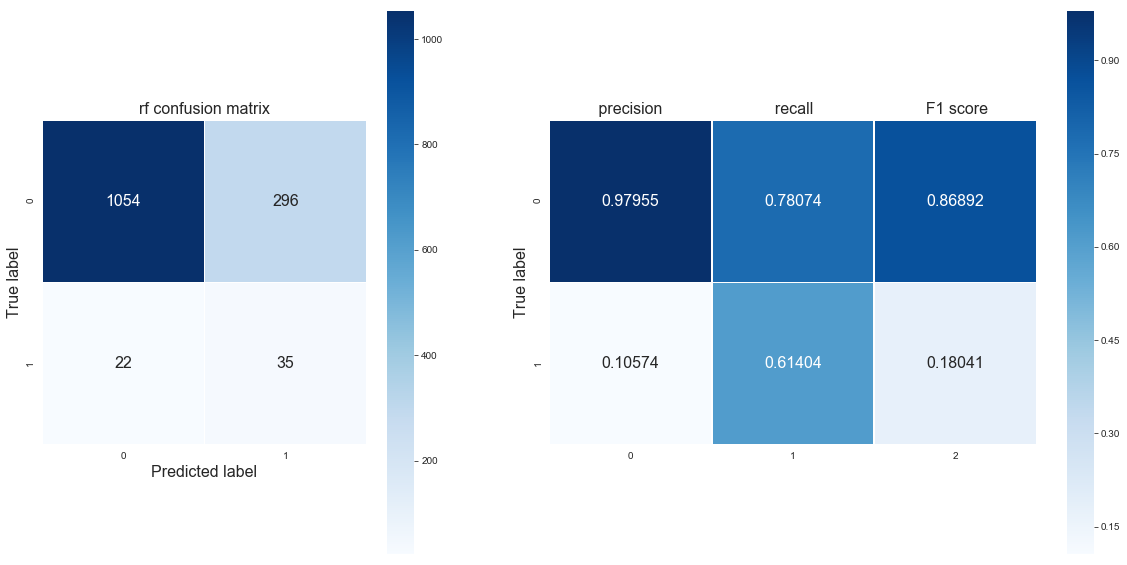

In [46]:
#%%----------------RF---------------------
# use randomforest model to train and predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



rf = RandomForestClassifier(n_estimators=20, 
                            n_jobs=-1,
                            random_state=42,
                            max_features="sqrt",
                            max_depth=3,
                            criterion="gini",
                            min_samples_leaf=3,
                            class_weight="balanced")
rf.fit(X_train_final, y_train)

# use randomforest model to train and predict
print("use randomforest model to train and predict")

rf_y_pred = rf.predict(X_test_final)
rf_test_acc = accuracy_score(y_test, rf_y_pred)
rf_classification_score = classification_report(y_test, rf_y_pred)
print("Rf model test accuracy:{:.4f}".format(rf_test_acc))
print("rf model classification_score:\n", rf_classification_score)
rf_confusion_score = confusion_matrix(y_test, rf_y_pred)
# print(rf_confusion_score)
f_rf, ax_rf = plt.subplots(1, 2,figsize=(20, 10),gridspec_kw={'width_ratios': [2, 3]})

rf_cm_pred_label_sum = rf_confusion_score.sum(axis=0)
rf_cm_true_label_sum = rf_confusion_score.sum(axis=1)
rf_precision_recall= np.empty([2, 3], dtype=float)
rf_precision_recall[0][0], rf_precision_recall[1][0] = rf_confusion_score[0][0] / rf_cm_pred_label_sum[0], \
                                                     rf_confusion_score[1][1] / rf_cm_pred_label_sum[1] 

rf_precision_recall[0][1], rf_precision_recall[1][1] = rf_confusion_score[0][0] / rf_cm_true_label_sum[0], \
                                               rf_confusion_score[1][1] / rf_cm_true_label_sum[1]
import statistics
rf_precision_recall[0][2], rf_precision_recall[1][2] = statistics.harmonic_mean([rf_precision_recall[0][0],rf_precision_recall[0][1]]),\
                                                statistics.harmonic_mean([rf_precision_recall[1][0],rf_precision_recall[1][1]])
                                          

sns.heatmap(rf_confusion_score, annot=True, fmt="d", cmap="Blues", ax=ax_rf[0], square=True, linewidths=0.5,annot_kws={"size": 16})
sns.heatmap(rf_precision_recall, annot=True, fmt=".5f", cmap="Blues", ax=ax_rf[1], square=True, linewidths=0.5,annot_kws={"size": 16})
ax_rf[0].set_title("rf confusion matrix", fontsize=16)
ax_rf[1].set_title("           precision                         recall                         F1 score", fontsize=16,loc='left')
ax_rf[0].set_xlabel("Predicted label", fontsize=16)
ax_rf[0].set_ylabel("True label", fontsize=16)
ax_rf[1].set_xlabel("", fontsize=16)
ax_rf[1].set_ylabel("True label", fontsize=16)

statistics.harmonic_mean([rf_precision_recall[0][0],rf_precision_recall[0][1]])

#plt.savefig(r"C:\Users\orastak\Desktop\grup2\RF_heat.png",dpi=300)
plt.show()
plt.close()


rf_y_proba_test = rf.predict_proba(X_test_final)[:,1]
rf_y_proba_train = rf.predict_proba(X_train_final)[:,1]


Text(0.5, 1.0, 'RF Feature Importance')

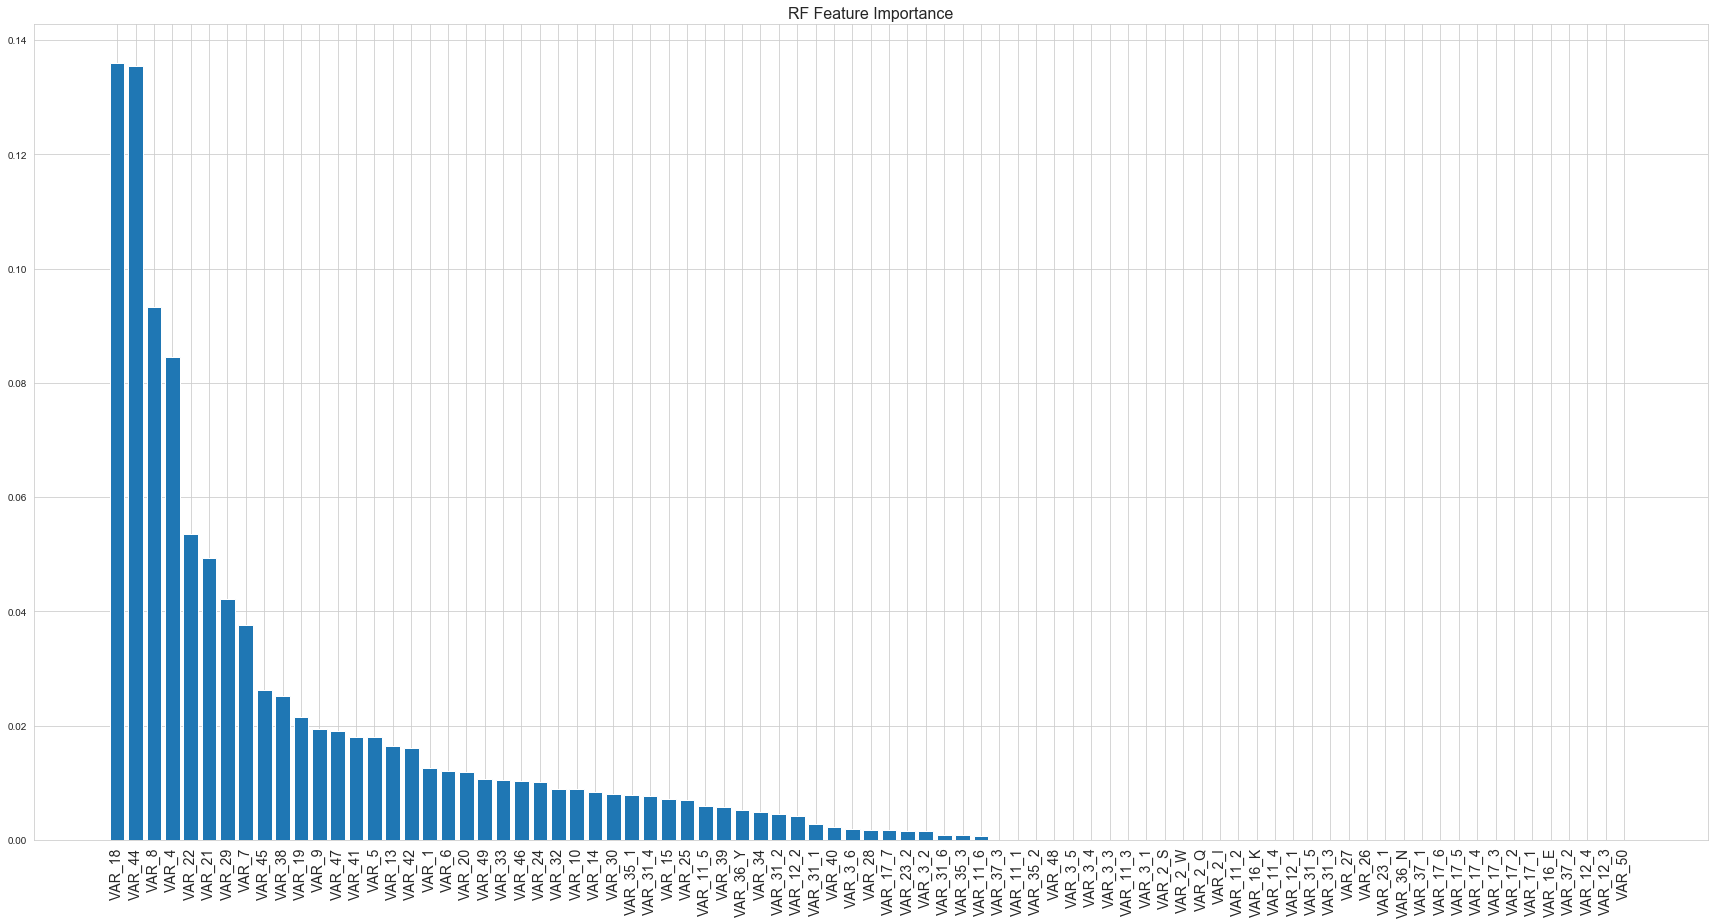

In [47]:
#%%-----------------RF future importance----------------------------------

# Plot features importance
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]
plt.figure(figsize=(30, 15))
plt.bar(range(0, indices.shape[0]), importances[indices], align="center")
plt.xticks(range(0, indices.shape[0]),
           X_train_final.columns[indices],
           fontsize=14,
           rotation=90)
plt.title("RF Feature Importance", {"fontsize": 16})
#plt.savefig(r"C:\Users\orastak\Desktop\grup2\RF_future_importance.png",dpi=300)


use randomforest model to train and predict
Gbc model test accuracy:0.7207
gbc model classification_score:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      1350
           1       0.10      0.75      0.18        57

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.54      0.74      0.51      1407
weighted avg       0.95      0.72      0.81      1407



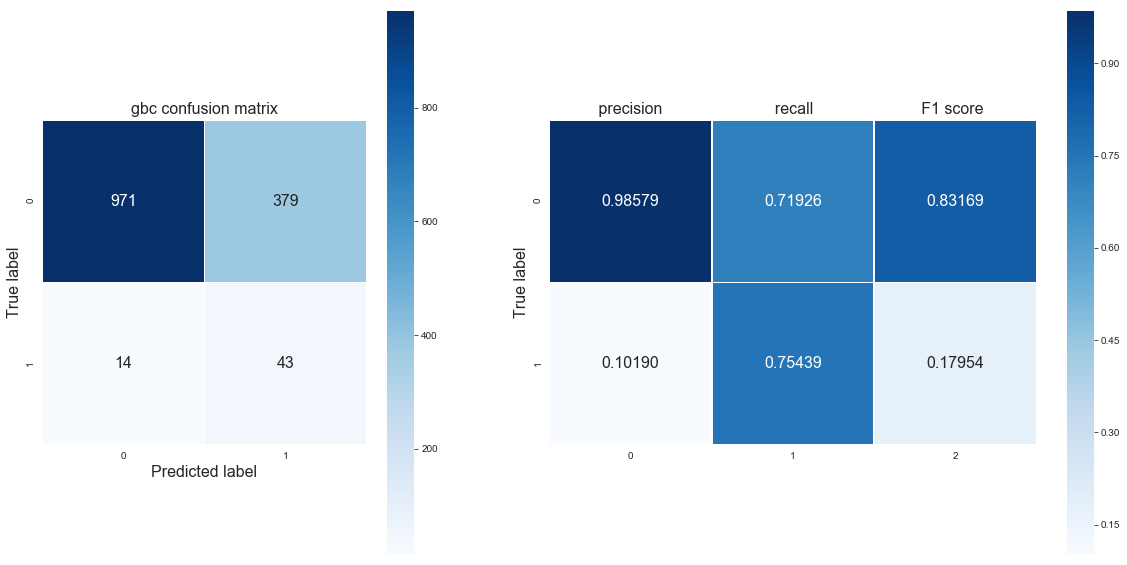

In [48]:
#%%------------------------GBC-----------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_sample_weight
sample_weight=compute_sample_weight(class_weight='balanced', y=y_train)

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(loss = "deviance",
              random_state=42,
              n_estimators = 50,
              learning_rate= 0.2,
              max_depth=  3,
              min_samples_leaf= 0.2,
              max_features= 5,
              min_samples_split=0.9
              )
gbc.fit(X_train_final, y_train,sample_weight=sample_weight)

# use randomforest model to train and predict
print("use randomforest model to train and predict")

gbc_y_pred = gbc.predict(X_test_final)
gbc_test_acc = accuracy_score(y_test, gbc_y_pred)
gbc_classification_score = classification_report(y_test, gbc_y_pred)
print("Gbc model test accuracy:{:.4f}".format(gbc_test_acc))
print("gbc model classification_score:\n", gbc_classification_score)
gbc_confusion_score = confusion_matrix(y_test, gbc_y_pred)
# print(gbc_confusion_score)
f_gbc, ax_gbc = plt.subplots(1, 2,figsize=(20, 10),gridspec_kw={'width_ratios': [2, 3]})

gbc_cm_pred_label_sum = gbc_confusion_score.sum(axis=0)
gbc_cm_true_label_sum = gbc_confusion_score.sum(axis=1)
gbc_precision_recall= np.empty([2, 3], dtype=float)
gbc_precision_recall[0][0], gbc_precision_recall[1][0] = gbc_confusion_score[0][0] / gbc_cm_pred_label_sum[0], \
                                                     gbc_confusion_score[1][1] / gbc_cm_pred_label_sum[1] 

gbc_precision_recall[0][1], gbc_precision_recall[1][1] = gbc_confusion_score[0][0] / gbc_cm_true_label_sum[0], \
                                               gbc_confusion_score[1][1] / gbc_cm_true_label_sum[1]
import statistics
gbc_precision_recall[0][2], gbc_precision_recall[1][2] = statistics.harmonic_mean([gbc_precision_recall[0][0],gbc_precision_recall[0][1]]),\
                                                statistics.harmonic_mean([gbc_precision_recall[1][0],gbc_precision_recall[1][1]])
                                          

sns.heatmap(gbc_confusion_score, annot=True, fmt="d", cmap="Blues", ax=ax_gbc[0], square=True, linewidths=0.5,annot_kws={"size": 16})
sns.heatmap(gbc_precision_recall, annot=True, fmt=".5f", cmap="Blues", ax=ax_gbc[1], square=True, linewidths=0.5,annot_kws={"size": 16})
ax_gbc[0].set_title("gbc confusion matrix", fontsize=16)
ax_gbc[1].set_title("           precision                         recall                        F1 score", fontsize=16,loc='left')
ax_gbc[0].set_xlabel("Predicted label", fontsize=16)
ax_gbc[0].set_ylabel("True label", fontsize=16)
ax_gbc[1].set_xlabel("", fontsize=16)
ax_gbc[1].set_ylabel("True label", fontsize=16)

statistics.harmonic_mean([gbc_precision_recall[0][0],gbc_precision_recall[0][1]])

#plt.savefig(r"C:\Users\orastak\Desktop\grup2\GBC_heat.png",dpi=300)
plt.show()
plt.close()


gbc_y_proba_test = gbc.predict_proba(X_test_final)[:,1]
gbc_y_proba_train = gbc.predict_proba(X_train_final)[:,1]

Text(0.5, 1.0, 'GBC Feature Importance')

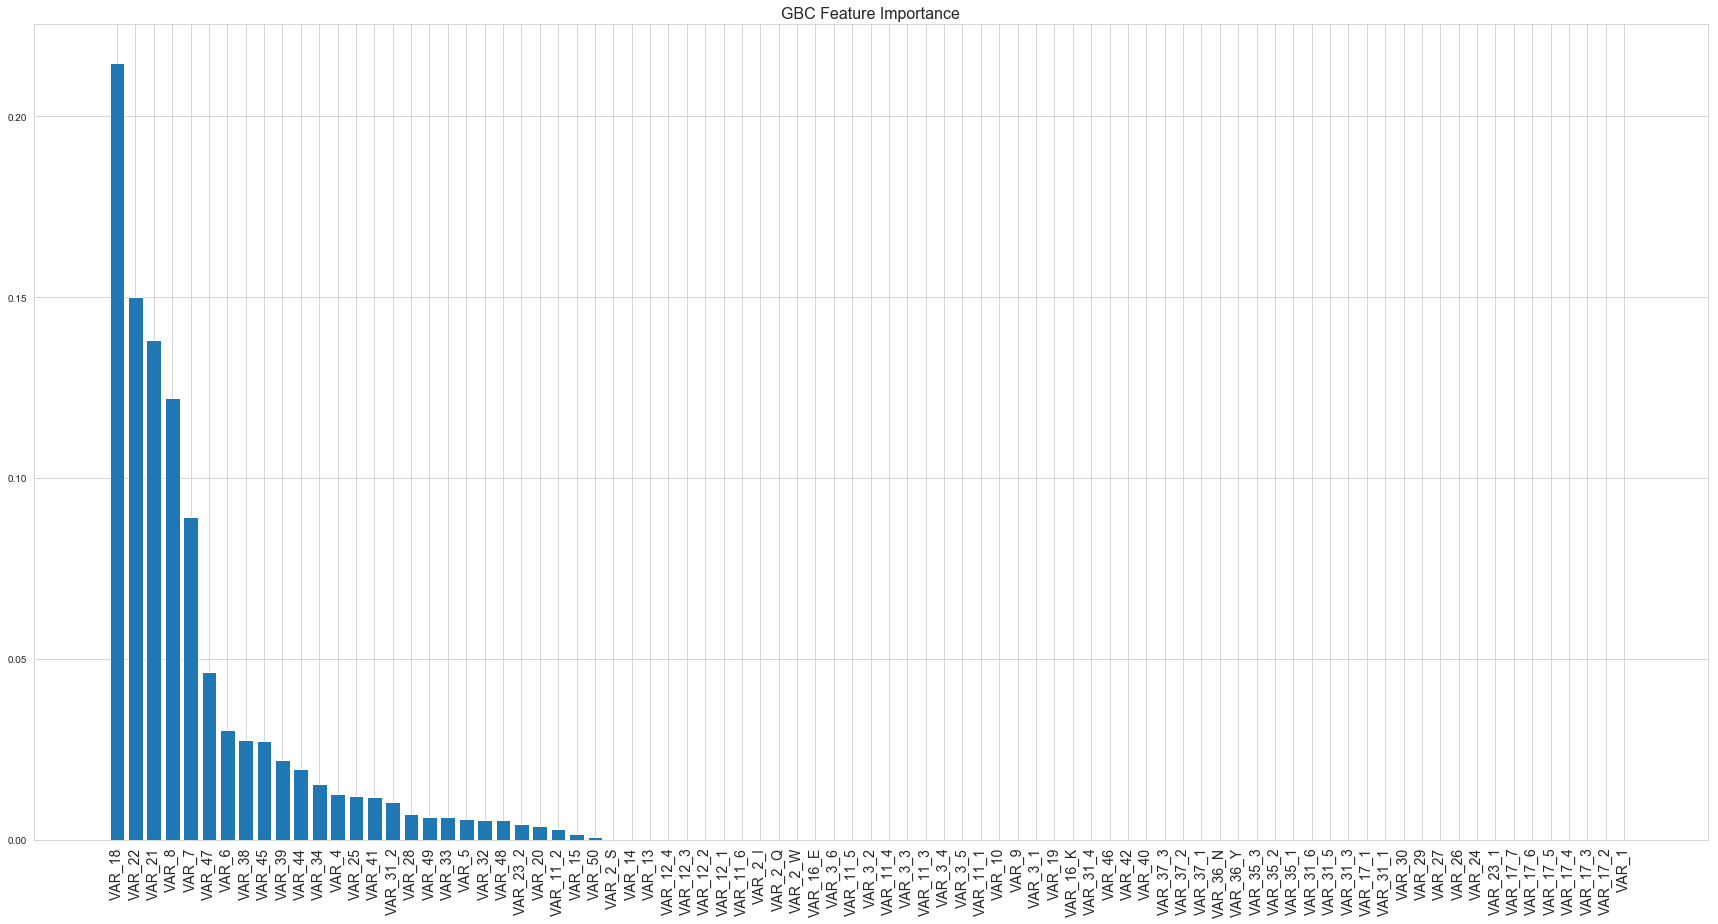

In [49]:
#%%--------------------------GBC future importance
# Plot features importance
importances = gbc.feature_importances_
indices = np.argsort(gbc.feature_importances_)[::-1]
plt.figure(figsize=(30, 15))
plt.bar(range(0, indices.shape[0]), importances[indices], align="center")
plt.xticks(range(0, indices.shape[0]),
           X_train_final.columns[indices],
           fontsize=14,
           rotation=90)
plt.title("GBC Feature Importance", {"fontsize": 16})
#plt.savefig(r"C:\Users\orastak\Desktop\grup2\GBC_future_importance.png",dpi=300)

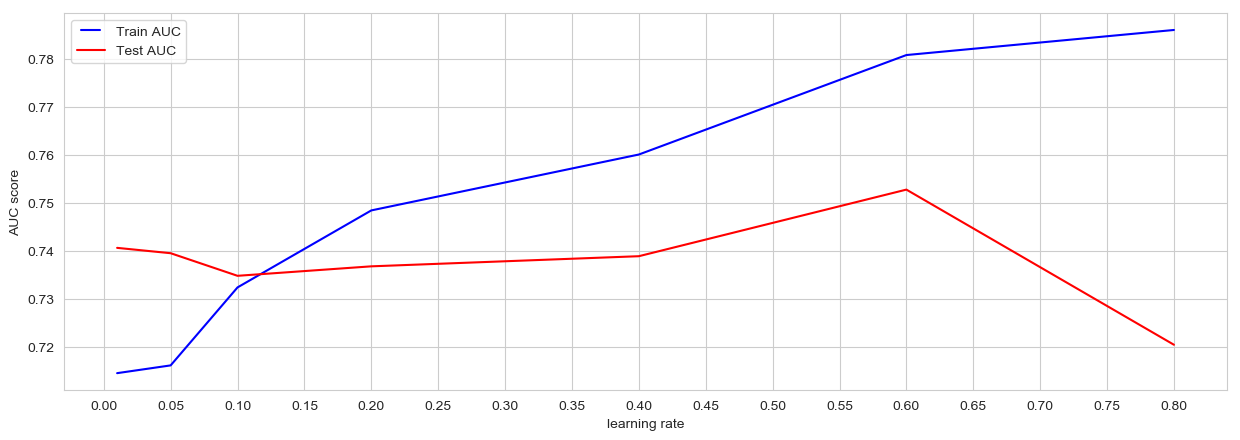

In [50]:
#%%---------learning rate result visualise
from sklearn.metrics import roc_curve, auc
learning_rates = [0.8,0.6, 0.4, 0.2, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(
       loss = "deviance",
              random_state=42,
              n_estimators = 50,
              max_depth=  3,
              min_samples_leaf= 0.2,
              max_features= 5,
              min_samples_split=0.9,
              learning_rate=eta)
   model.fit(X_train_final, y_train,sample_weight=sample_weight)
   train_pred = model.predict(X_train_final)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test_final)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(15,5),dpi=100)
plt.xticks(np.arange(0, 1, step=0.05))
line1, = plt.plot(learning_rates, train_results, "b", label="Train AUC")
line2, = plt.plot(learning_rates, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

C:\Users\orastak\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


use randomforest model to train and predict
Logr model test accuracy:0.7392
logr model classification_score:
               precision    recall  f1-score   support

           0       0.98      0.74      0.85      1350
           1       0.10      0.65      0.17        57

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.54      0.70      0.51      1407
weighted avg       0.94      0.74      0.82      1407



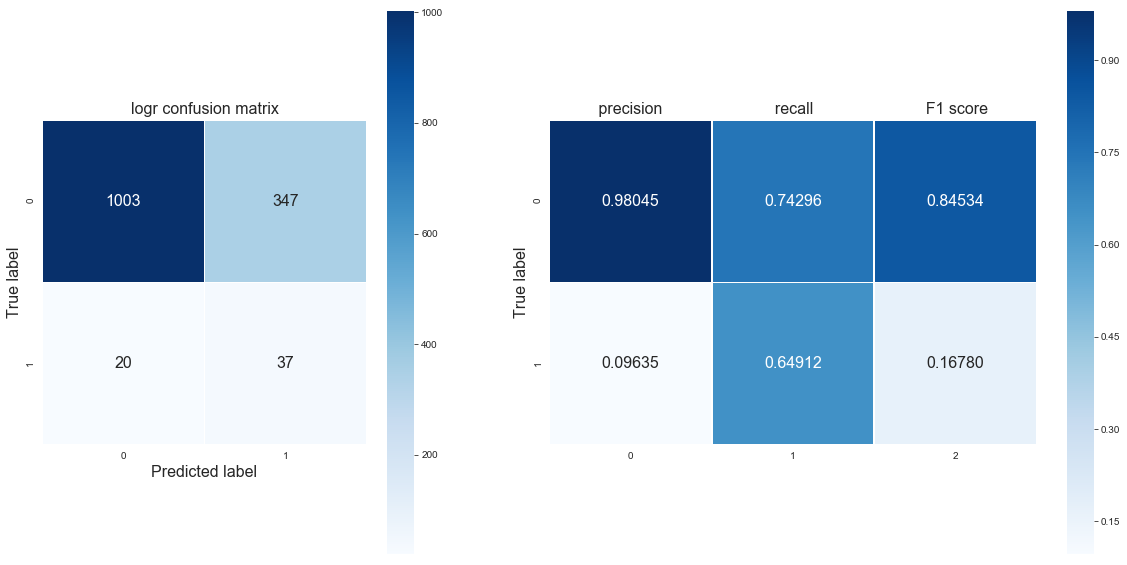

In [51]:
#%%---------------------------LOGR-----------------------
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(class_weight="balanced",random_state = 42,penalty = 'l2',solver="sag",max_iter=25)
logr.fit(X_train_final, y_train)

# use randomforest model to train and predict
print("use randomforest model to train and predict")

logr_y_pred = logr.predict(X_test_final)
logr_test_acc = accuracy_score(y_test, logr_y_pred)
logr_classification_score = classification_report(y_test, logr_y_pred)
print("Logr model test accuracy:{:.4f}".format(logr_test_acc))
print("logr model classification_score:\n", logr_classification_score)
logr_confusion_score = confusion_matrix(y_test, logr_y_pred)
# print(logr_confusion_score)
f_logr, ax_logr = plt.subplots(1, 2,figsize=(20, 10),gridspec_kw={'width_ratios': [2, 3]})

logr_cm_pred_label_sum = logr_confusion_score.sum(axis=0)
logr_cm_true_label_sum = logr_confusion_score.sum(axis=1)
logr_precision_recall= np.empty([2, 3], dtype=float)
logr_precision_recall[0][0], logr_precision_recall[1][0] = logr_confusion_score[0][0] / logr_cm_pred_label_sum[0], \
                                                     logr_confusion_score[1][1] / logr_cm_pred_label_sum[1] 

logr_precision_recall[0][1], logr_precision_recall[1][1] = logr_confusion_score[0][0] / logr_cm_true_label_sum[0], \
                                               logr_confusion_score[1][1] / logr_cm_true_label_sum[1]
import statistics
logr_precision_recall[0][2], logr_precision_recall[1][2] = statistics.harmonic_mean([logr_precision_recall[0][0],logr_precision_recall[0][1]]),\
                                                statistics.harmonic_mean([logr_precision_recall[1][0],logr_precision_recall[1][1]])
                                          

sns.heatmap(logr_confusion_score, annot=True, fmt="d", cmap="Blues", ax=ax_logr[0], square=True, linewidths=0.5,annot_kws={"size": 16})
sns.heatmap(logr_precision_recall, annot=True, fmt=".5f", cmap="Blues", ax=ax_logr[1], square=True, linewidths=0.5,annot_kws={"size": 16})
ax_logr[0].set_title("logr confusion matrix", fontsize=16)
ax_logr[1].set_title("           precision                         recall                         F1 score", fontsize=16,loc='left')
ax_logr[0].set_xlabel("Predicted label", fontsize=16)
ax_logr[0].set_ylabel("True label", fontsize=16)
ax_logr[1].set_xlabel("", fontsize=16)
ax_logr[1].set_ylabel("True label", fontsize=16)

statistics.harmonic_mean([logr_precision_recall[0][0],logr_precision_recall[0][1]])
logr_y_proba_test = logr.predict_proba(X_test_final)[:,1]
logr_y_proba_train = logr.predict_proba(X_train_final)[:,1]
#plt.savefig(r"C:\Users\orastak\Desktop\grup2\LOGR_heat.png",dpi=300)
plt.show()
plt.close()

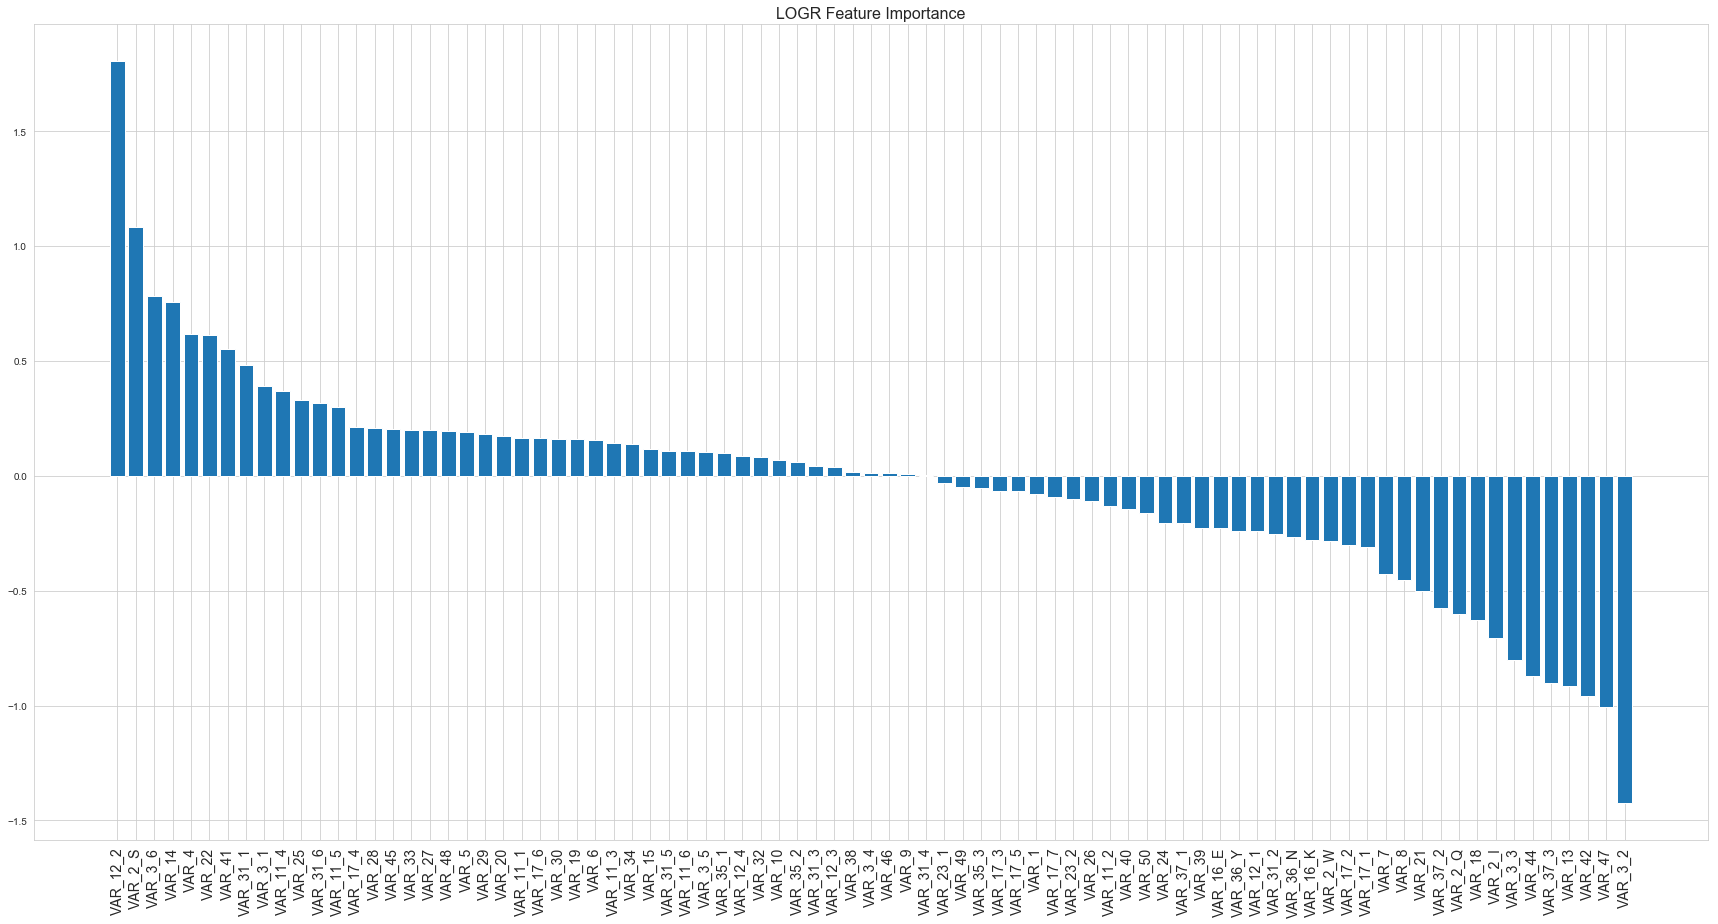

In [52]:
#%%--------------------------LOGR future importance
# Plot features importance
importances = np.array(logr.coef_[0])
indices = np.argsort(logr.coef_[0])[::-1]

plt.figure(figsize=(30, 15))
plt.bar(range(0, indices.shape[0]), importances[indices], align="center")
plt.xticks(range(0, indices.shape[0]),
           X_train_final.columns[indices],
           fontsize=14,
           rotation=90)
plt.title("LOGR Feature Importance", {"fontsize": 16})
plt.savefig(r"C:\Users\orastak\Desktop\grup2\LOGR_future_importance.png",dpi=300)

use randomforest model to train and predict
Xgb model test accuracy:0.7178
xgb model classification_score:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1350
           1       0.10      0.70      0.17        57

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.54      0.71      0.50      1407
weighted avg       0.95      0.72      0.80      1407



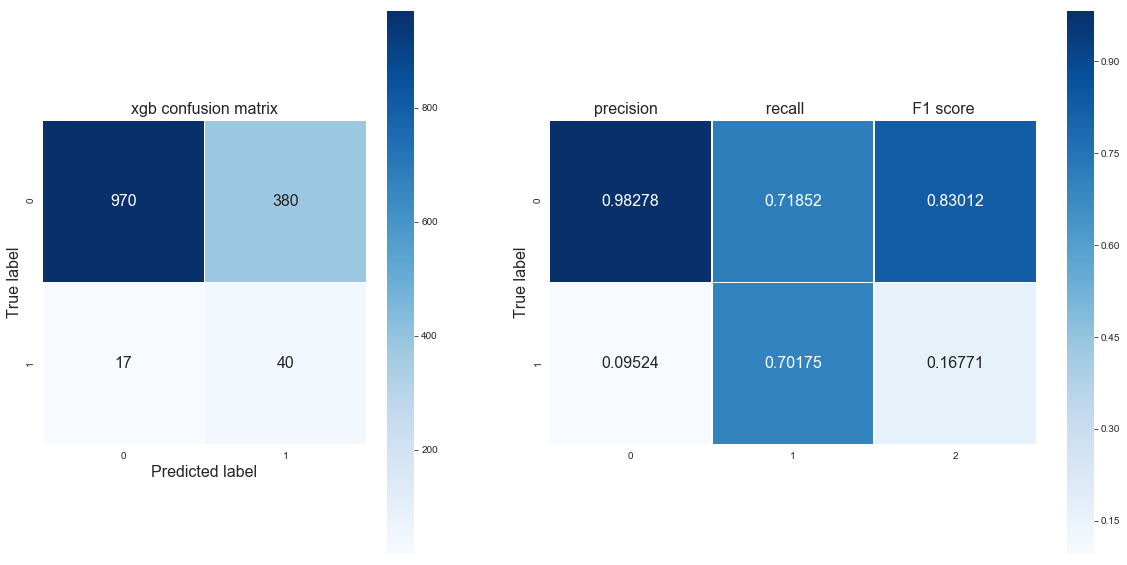

In [53]:
#%%
xgb = XGBClassifier(scale_pos_weight=21.3,
                        objective ='reg:squarederror',
                        max_depth=2, 
                        learning_rate=0.05,
                        min_child_weight=X_train_final.shape[0]/50, 
                        n_jobs=-1, 
                        n_estimators=30, 
                        colsample_bytree=0.3,
                        random_state=42)
xgb.fit(X_train_final, y_train)

# use randomforest model to train and predict
print("use randomforest model to train and predict")

xgb_y_pred = xgb.predict(X_test_final)
xgb_test_acc = accuracy_score(y_test, xgb_y_pred)
xgb_classification_score = classification_report(y_test, xgb_y_pred)
print("Xgb model test accuracy:{:.4f}".format(xgb_test_acc))
print("xgb model classification_score:\n", xgb_classification_score)
xgb_confusion_score = confusion_matrix(y_test, xgb_y_pred)
# print(xgb_confusion_score)
f_xgb, ax_xgb = plt.subplots(1, 2,figsize=(20, 10),gridspec_kw={'width_ratios': [2, 3]})

xgb_cm_pred_label_sum = xgb_confusion_score.sum(axis=0)
xgb_cm_true_label_sum = xgb_confusion_score.sum(axis=1)
xgb_precision_recall= np.empty([2, 3], dtype=float)
xgb_precision_recall[0][0], xgb_precision_recall[1][0] = xgb_confusion_score[0][0] / xgb_cm_pred_label_sum[0], \
                                                     xgb_confusion_score[1][1] / xgb_cm_pred_label_sum[1] 

xgb_precision_recall[0][1], xgb_precision_recall[1][1] = xgb_confusion_score[0][0] / xgb_cm_true_label_sum[0], \
                                               xgb_confusion_score[1][1] / xgb_cm_true_label_sum[1]
import statistics
xgb_precision_recall[0][2], xgb_precision_recall[1][2] = statistics.harmonic_mean([xgb_precision_recall[0][0],xgb_precision_recall[0][1]]),\
                                                statistics.harmonic_mean([xgb_precision_recall[1][0],xgb_precision_recall[1][1]])
                                          

sns.heatmap(xgb_confusion_score, annot=True, fmt="d", cmap="Blues", ax=ax_xgb[0], square=True, linewidths=0.5,annot_kws={"size": 16})
sns.heatmap(xgb_precision_recall, annot=True, fmt=".5f", cmap="Blues", ax=ax_xgb[1], square=True, linewidths=0.5,annot_kws={"size": 16})
ax_xgb[0].set_title("xgb confusion matrix", fontsize=16)
ax_xgb[1].set_title("          precision                        recall                        F1 score", fontsize=16,loc='left')
ax_xgb[0].set_xlabel("Predicted label", fontsize=16)
ax_xgb[0].set_ylabel("True label", fontsize=16)
ax_xgb[1].set_xlabel("", fontsize=16)
ax_xgb[1].set_ylabel("True label", fontsize=16)

statistics.harmonic_mean([xgb_precision_recall[0][0],xgb_precision_recall[0][1]])

plt.savefig(r"C:\Users\orastak\Desktop\grup2\XGB_heat.png",dpi=300)
plt.show()
plt.close()

xgb_y_proba_test = xgb.predict_proba(X_test_final)[:,1]
xgb_y_proba_train = xgb.predict_proba(X_train_final)[:,1]


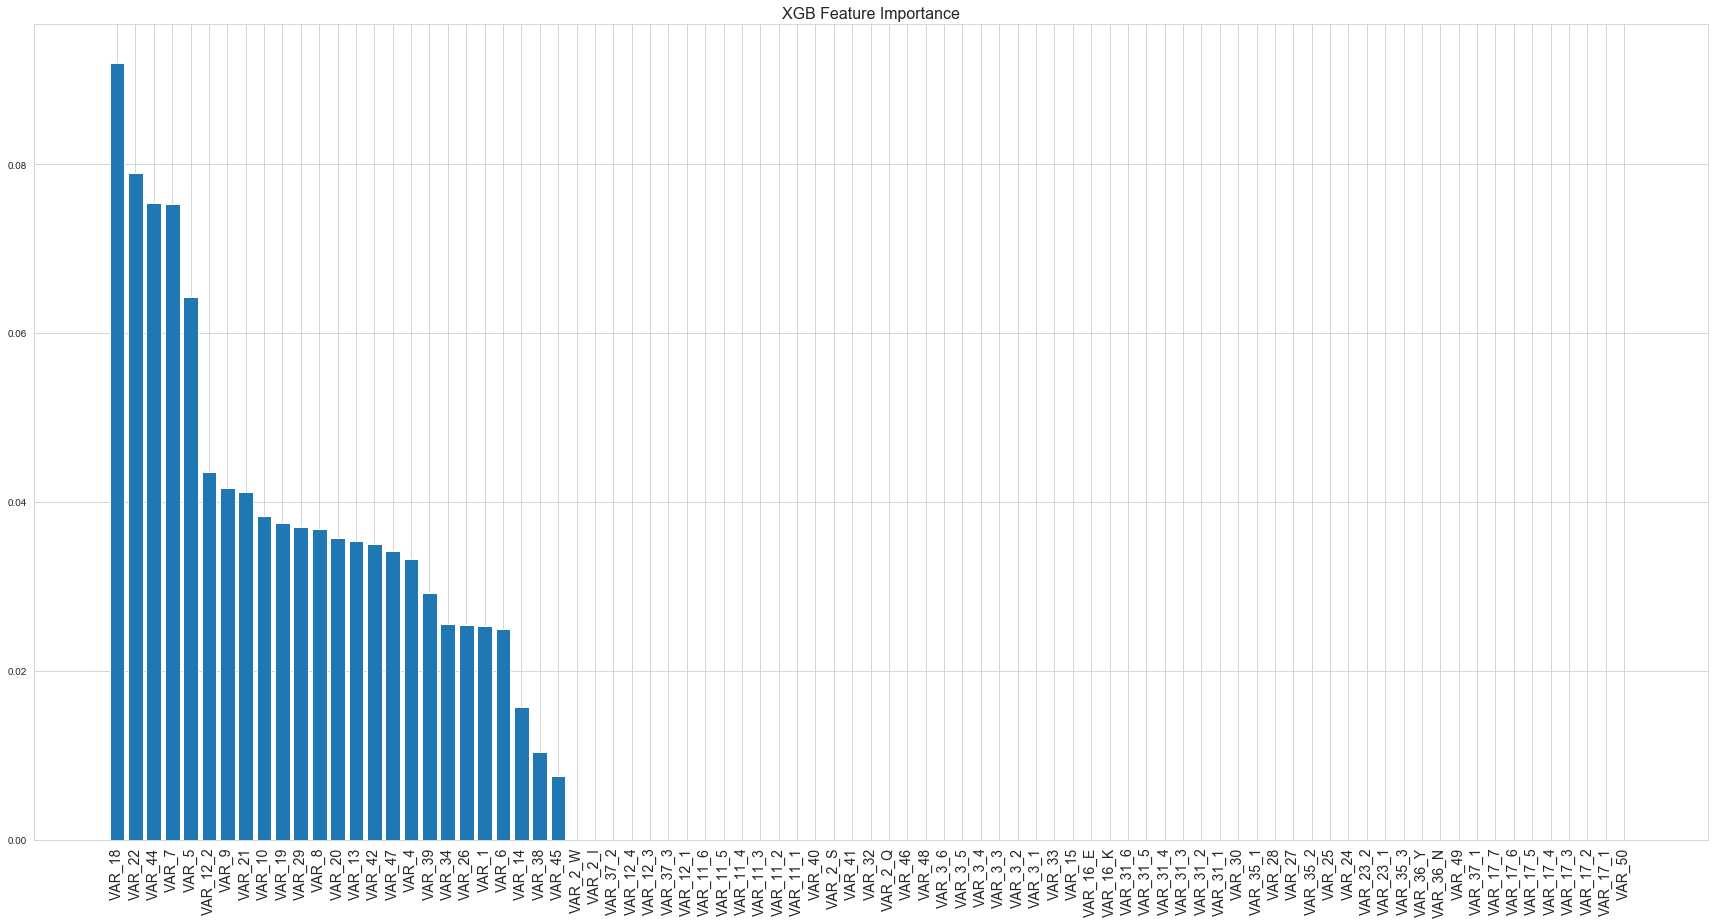

In [54]:
#%%--------------------------XGB future importance
# Plot features importance
importances = xgb.feature_importances_
indices = np.argsort(xgb.feature_importances_)[::-1]
plt.figure(figsize=(30, 15))
plt.bar(range(0, indices.shape[0]), importances[indices], align="center")
plt.xticks(range(0, indices.shape[0]),
           X_train_final.columns[indices],
           fontsize=14,
           rotation=90)
plt.title("XGB Feature Importance", {"fontsize": 16})
plt.savefig(r"C:\Users\orastak\Desktop\grup2\XGB_future_importance.png",dpi=300)

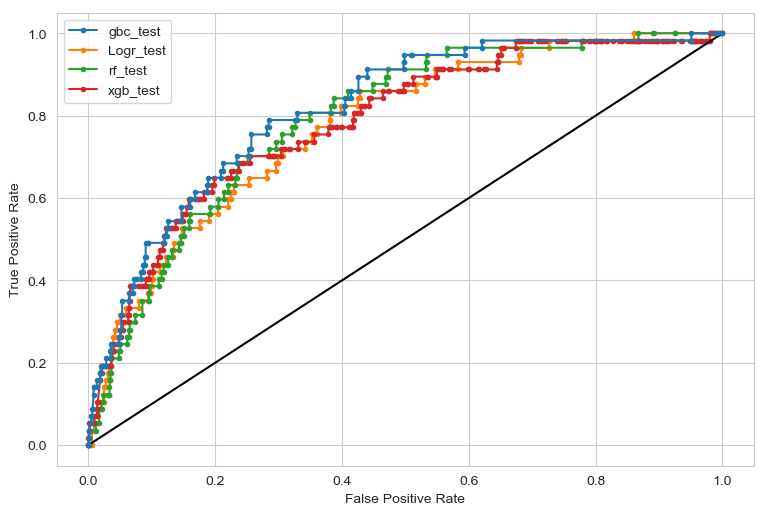

In [55]:
#%%-------------TEST ROC CURVES
import matplotlib.pyplot as plt
#img = plt.imread(r"C:\Users\orastak\Desktop\grup2\background.jpg")
#fig ,ax= plt.subplots()
#ax.imshow(img,zorder=0)
plt.figure(figsize=(9, 6),dpi=100)
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test, gbc_y_proba_test)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='gbc_test',zorder=20)

lr_fpr, lr_tpr, _ = roc_curve(y_test, logr_y_proba_test)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logr_test')

lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_y_proba_test)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='rf_test')

lr_fpr, lr_tpr, _ = roc_curve(y_test, xgb_y_proba_test)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='xgb_test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.plot([0,1],[0,1],color="k")
# show the plot
plt.show()



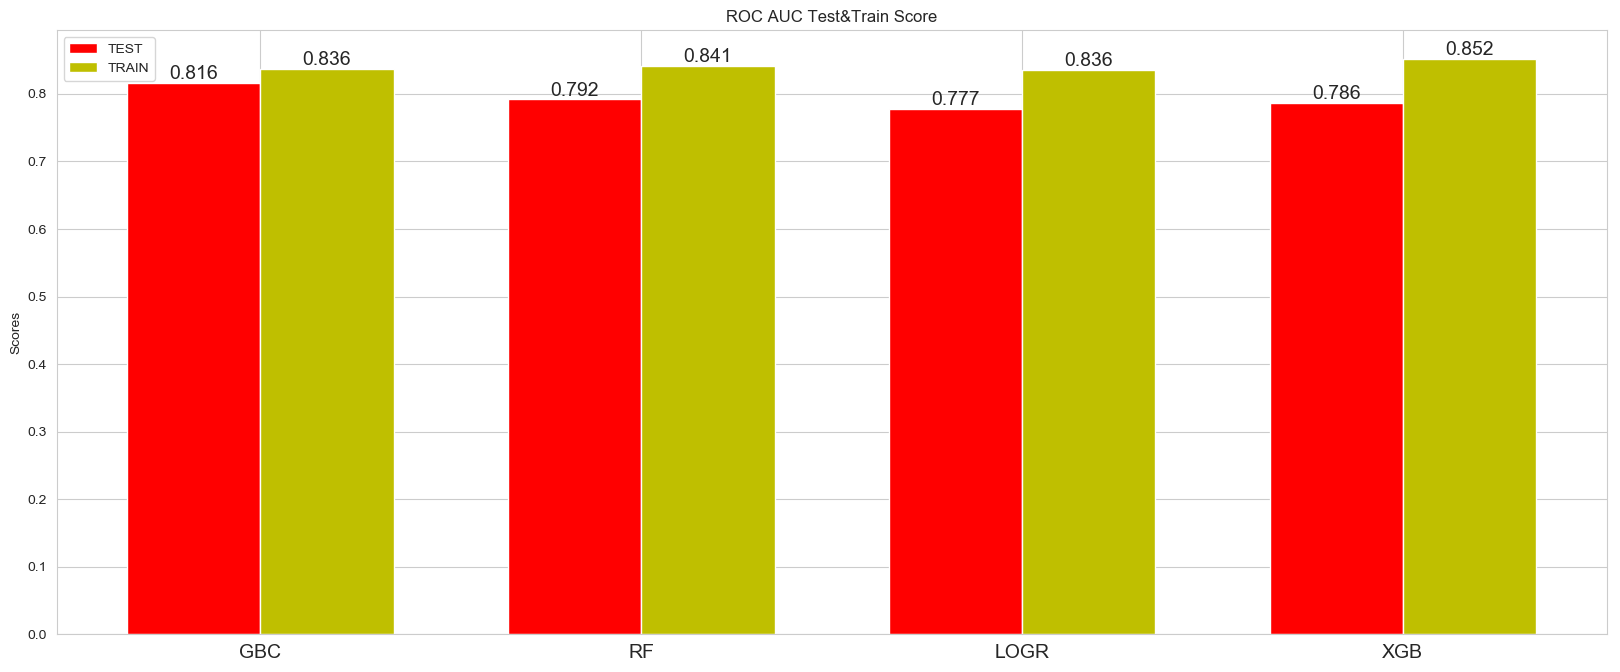

In [56]:
#%%-------------ROC AUC Test&Train Score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
aoc_scores_dict={}
N = 4
aoc_scores_dict["GBC"]=(roc_auc_score(y_test,gbc_y_proba_test),roc_auc_score(y_train,gbc_y_proba_train))
aoc_scores_dict["RF"]=(roc_auc_score(y_test,rf_y_proba_test),roc_auc_score(y_train,rf_y_proba_train))
aoc_scores_dict["LOGR"]=(roc_auc_score(y_test,logr_y_proba_test),roc_auc_score(y_train,logr_y_proba_train))
aoc_scores_dict["XGB"]=(roc_auc_score(y_test,xgb_y_proba_test),roc_auc_score(y_train,xgb_y_proba_train))

bars1=[aoc_scores_dict["GBC"][0],aoc_scores_dict["RF"][0],aoc_scores_dict["LOGR"][0],aoc_scores_dict["XGB"][0]]
bars2 =[aoc_scores_dict["GBC"][1],aoc_scores_dict["RF"][1],aoc_scores_dict["LOGR"][1],aoc_scores_dict["XGB"][1]]

ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars


fig, ax = plt.subplots(figsize=(20, 8),dpi=100)
rects1 = ax.bar(ind, bars1, width, color='r')

rects2 = ax.bar(ind + width, bars2, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('ROC AUC Test&Train Score')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('GBC', 'RF', 'LOGR',"XGB"),fontsize=14)

ax.legend((rects1[0], rects2[0]), ('TEST', "TRAIN"))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.3f' % height,fontsize=14,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.savefig(r"C:\Users\orastak\Desktop\grup2\roc_auc.png",dpi=100)

plt.show()



In [57]:

#%%--------------DIRECTLY XGB WITHOUT IMPUTATION--------------------------
def VariableConverter(df,variable_list):
    df_copy=df.copy()
    for col in variable_list:
        try:
            df_copy[col] = df_copy[col].astype('object')
        except:
            pass
    
    return df_copy
nominal_variables=list(set(item for item in data_info.loc[data_info.Variable_Structure=="Nominal"].index)-set(["VAR_TARGET"]))
X_train_directly_XGB=VariableConverter(X_train,nominal_variables)
X_test_directly_XGB=VariableConverter(X_test,nominal_variables)
X_train_directly_XGB.dtypes #let's check

from category_encoders import BinaryEncoder    
from category_encoders import OneHotEncoder 

binary_encoded_list2=[item for item in nominal_variables if item in data_info.loc[(data_info.iloc[:,5]>4)].index]
be=BinaryEncoder(cols=binary_encoded_list2)
be.fit(X_train_directly_XGB)
X_train_directly_XGB=be.transform(X_train_directly_XGB)
X_test_directly_XGB=be.transform(X_test_directly_XGB)
for col in binary_encoded_list:
    col_0=col+"_0"
    X_train_directly_XGB=X_train_directly_XGB.drop(col_0, axis=1)
    X_test_directly_XGB=X_test_directly_XGB.drop(col_0, axis=1)
del col
del col_0

onehot_encoded_list2=[item for item in nominal_variables if item in data_info.loc[(data_info.iloc[:,5]<=4)].index]+["VAR_22"]
ohe=OneHotEncoder(cols=onehot_encoded_list2)
ohe.fit(X_train_directly_XGB)
X_train_directly_XGB=ohe.transform(X_train_directly_XGB)
X_test_directly_XGB=ohe.transform(X_test_directly_XGB)

import collections
collections.Counter(y_train)
collections.Counter(y_train)[0]/collections.Counter(y_train)[1] #=21.32
collections.Counter(y_train)[0]/collections.Counter(y_train)[0]+collections.Counter(y_train)[1]

bst =XGBClassifier(scale_pos_weight=21.3,
                        objective ='reg:squarederror',
                        max_depth=2, 
                        learning_rate=0.05,
                        min_child_weight=X_train_directly_XGB.shape[0]/50, 
                        n_jobs=-1, 
                        n_estimators=30, 
                        colsample_bytree=0.3,
                        random_state=42)
bst.fit(X_train_directly_XGB,y_train)
# test et
import numpy as np
# preds = np.argmax(bst.predict(dtest), axis=1)
preds = bst.predict(X_test_directly_XGB)
proba = bst.predict_proba(X_test_directly_XGB)[:,1]
import random

# testx icin tahminler

# sklearn performans olcutleri
from sklearn.metrics import precision_score, accuracy_score
# Keskinlik ve dogruluk
print("XGB precision:",precision_score(y_test, preds, average='macro'))
print("XGB accurcy:",accuracy_score(y_test,preds))
print("XGB test ROC auc score=%.3f" % (roc_auc_score(y_test, proba)))
y_prob_train=bst.predict_proba(X_train_directly_XGB)[:,1]
# summarize scores
print('XGB train ROC AUC=%.3f' % (roc_auc_score(y_train, y_prob_train)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)
print("XGB confusion matrix:\n",cm)


XGB precision: 0.5389115479115479
XGB accurcy: 0.7256574271499645
XGB test ROC auc score=0.791
XGB train ROC AUC=0.854
XGB confusion matrix:
 [[982 368]
 [ 18  39]]


In [58]:
#%%
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_final, y_train)
y_pred = knn.predict(X_test_final)
y_proba = knn.predict_proba(X_test_final)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_proba)

[[1345    5]
 [  57    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1350
           1       0.00      0.00      0.00        57

   micro avg       0.96      0.96      0.96      1407
   macro avg       0.48      0.50      0.49      1407
weighted avg       0.92      0.96      0.94      1407



0.5200649772579597

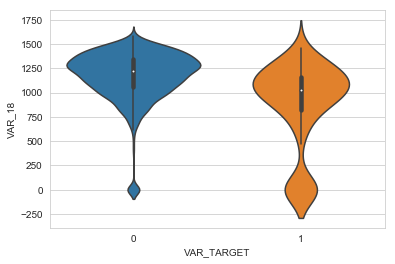

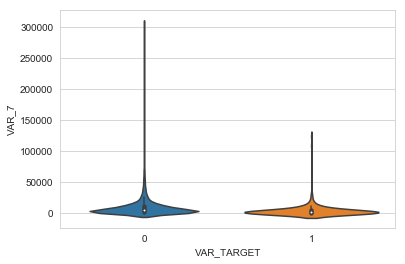

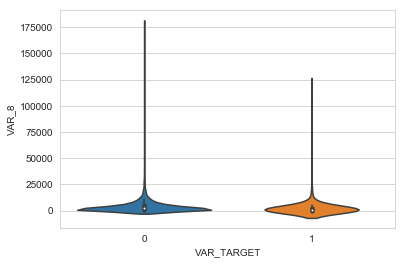

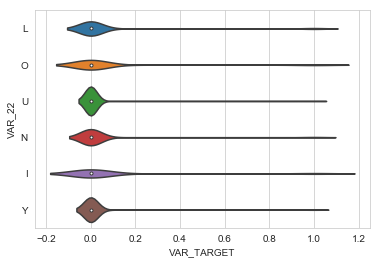

In [59]:

#%%  violin plot deneme
sns.violinplot(y=df["VAR_18"], x=df["VAR_TARGET"]) #CREDIT BUREAU SCORE
plt.savefig(r"C:\Users\orastak\Desktop\grup2\violin_VAR_18.png",dpi=100)
plt.show()
sns.violinplot(y=df["VAR_7"], x=df["VAR_TARGET"]) #TOTAL LIMIT
plt.savefig(r"C:\Users\orastak\Desktop\grup2\violin_VAR_7.png",dpi=100)
plt.show()

sns.violinplot(y=df["VAR_8"], x=df["VAR_TARGET"]) #TOTAL BALANCE OF ALL CREDIT CARDS
plt.savefig(r"C:\Users\orastak\Desktop\grup2\violin_VAR_8.png",dpi=100)
plt.show()

sns.violinplot(y=df["VAR_22"], x=df["VAR_TARGET"]) #LEVEL OF EDUCATION 
plt.savefig(r"C:\Users\orastak\Desktop\grup2\violin_VAR_22.png",dpi=100)
plt.show()

In [60]:
#%%
"""
from xverse.transformer import WOE

mbin= WOE()
mbin.fit(df[["VAR_18"]], df[["VAR_TARGET"]])

print(clf.bins)
output_bins = mbin.bins #will be used later in this exercise
"""

'\nfrom xverse.transformer import WOE\n\nmbin= WOE()\nmbin.fit(df[["VAR_18"]], df[["VAR_TARGET"]])\n\nprint(clf.bins)\noutput_bins = mbin.bins #will be used later in this exercise\n'

In [61]:
# #%%
# from sklearn.preprocessing import MinMaxScaler
# plt.figure(figsize=(5, 5))

# mms = MinMaxScaler()
# var_18_scaled=mms.fit_transform(np.array(df.loc[:,"VAR_18"]).reshape(-1,1))

# plt.scatter(df["VAR_TARGET"].values,var_18_scaled,s=1)
# plt.show()


# mms = MinMaxScaler()
# var_7_scaled=mms.fit_transform(np.array(df.loc[:,"VAR_7"]).reshape(-1,1))
# plt.figure(figsize=(5, 5))
# plt.scatter(df["VAR_TARGET"].values,var_7_scaled,s=1)
# plt.show()    #total limit az iken batma ihtimali yüksektir

In [62]:
df_test_final=pd.concat([y_test,X_test_final], axis=1 ,sort=False)
df_train_final=pd.concat([y_train,X_train_final], axis=1 ,sort=False)

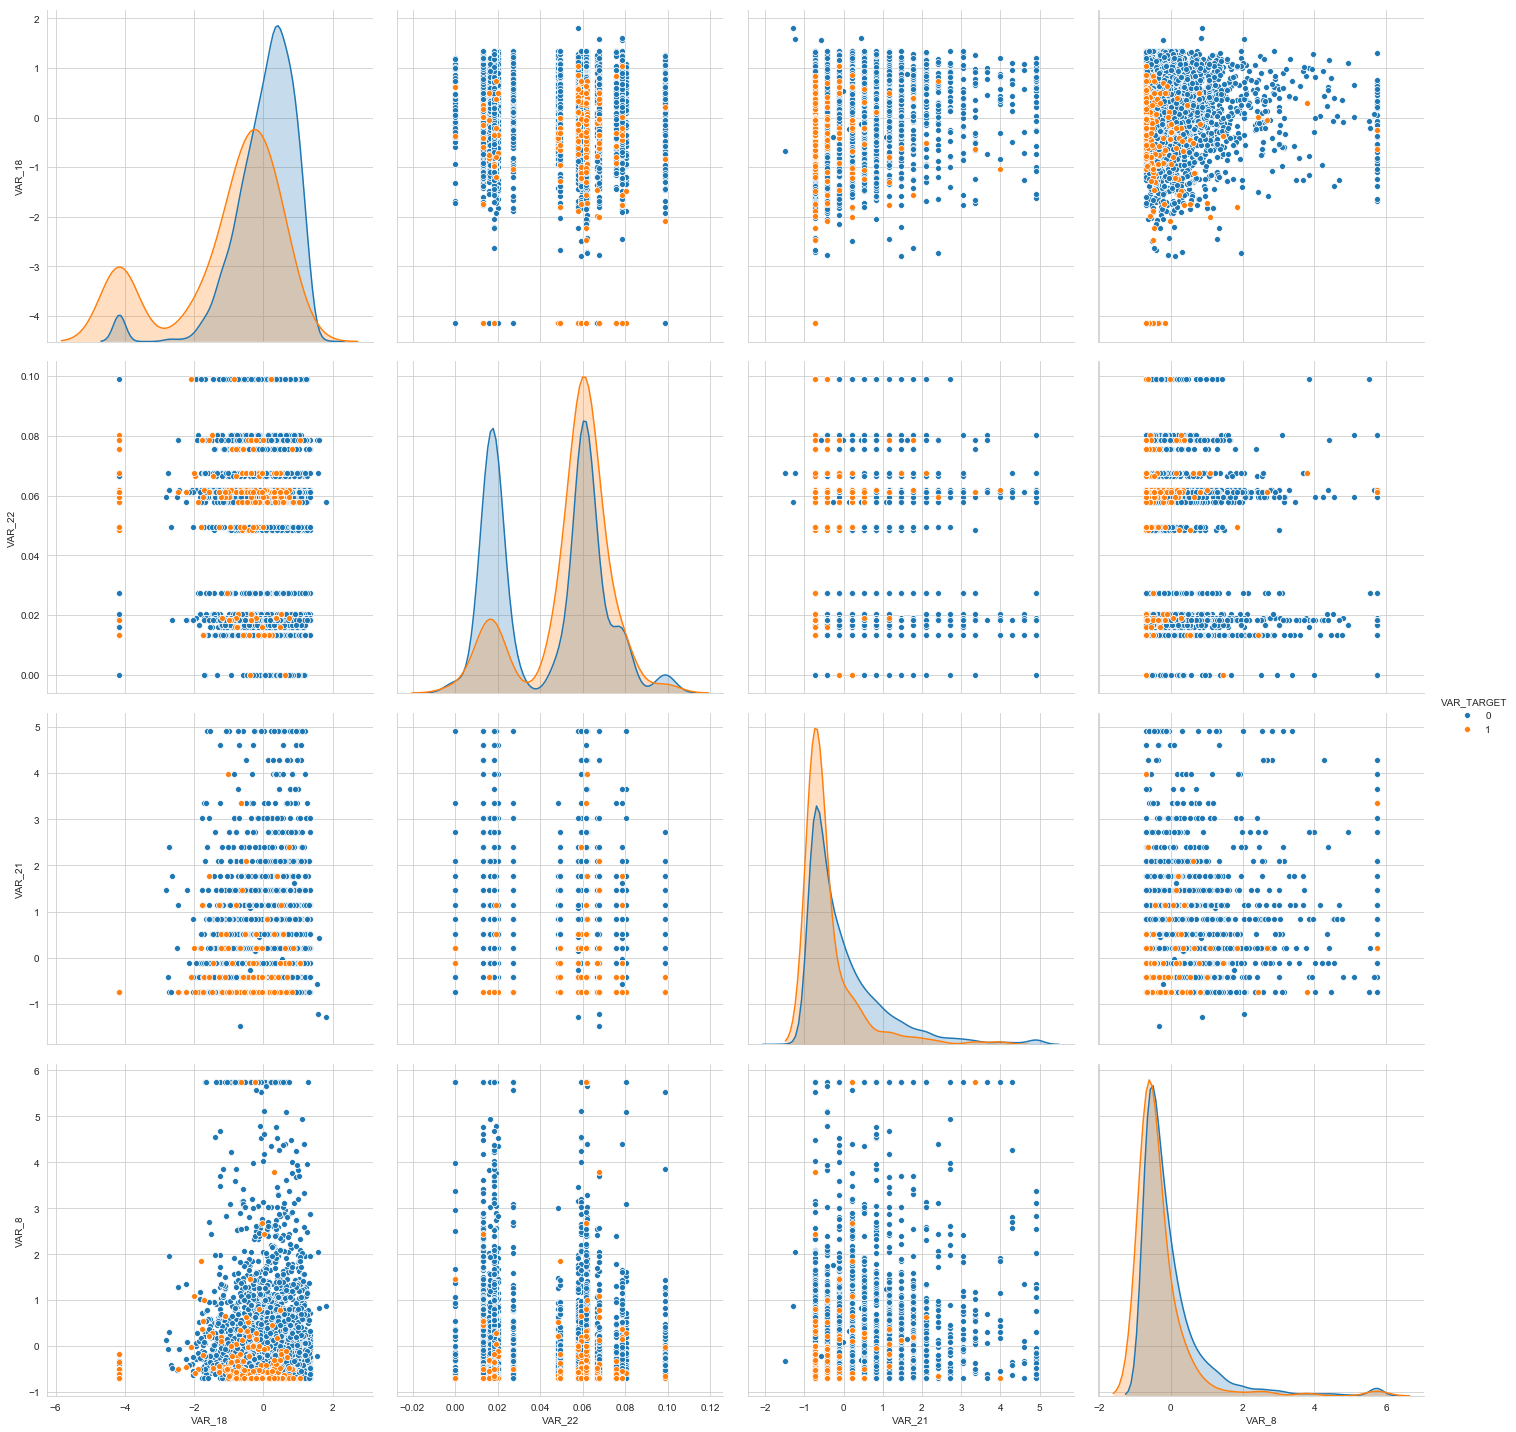

In [63]:
sns.pairplot(df_train_final, hue="VAR_TARGET",vars=["VAR_18","VAR_22","VAR_21","VAR_8"],height=5,kind="scatter")


0.0023837902264600714
0.02375181774115366
0.05394990366088632
0.06675392670157068
0.0776255707762557
0.2781456953642384


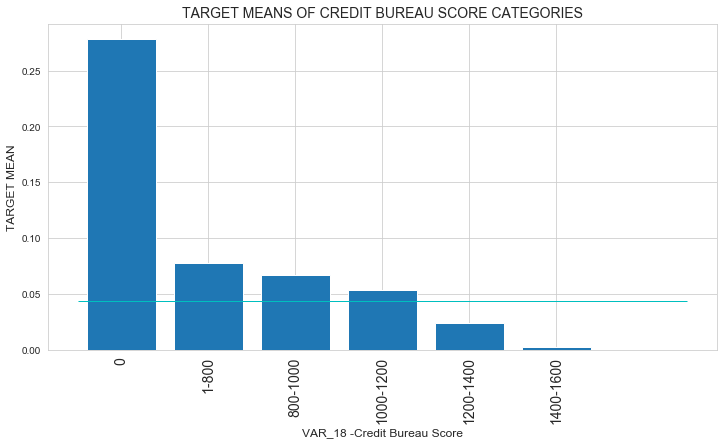

In [64]:
#%%
print(df[(df["VAR_18"]>1400)&(df["VAR_18"]<1600)]["VAR_TARGET"].mean())
print(df[(df["VAR_18"]>1200)&(df["VAR_18"]<1400)]["VAR_TARGET"].mean())
print(df[(df["VAR_18"]>1000)&(df["VAR_18"]<1200)]["VAR_TARGET"].mean())
print(df[(df["VAR_18"]>800)&(df["VAR_18"]<1000)]["VAR_TARGET"].mean())
print(df[(df["VAR_18"]>1)&(df["VAR_18"]<800)]["VAR_TARGET"].mean())
print(df[(df["VAR_18"]>-1)&(df["VAR_18"]<1)]["VAR_TARGET"].mean())
#%%
import matplotlib.pyplot as plt
import numpy as np
label = ["0","1-800",'800-1000','1000-1200','1200-1400','1400-1600',]
means = [
        
        df[(df["VAR_18"]>-1)&(df["VAR_18"]<1)]["VAR_TARGET"].mean(),
        df[(df["VAR_18"]>1)&(df["VAR_18"]<800)]["VAR_TARGET"].mean(),
        df[(df["VAR_18"]>800)&(df["VAR_18"]<1000)]["VAR_TARGET"].mean(),
        df[(df["VAR_18"]>1000)&(df["VAR_18"]<1200)]["VAR_TARGET"].mean(),
        df[(df["VAR_18"]>1200)&(df["VAR_18"]<1400)]["VAR_TARGET"].mean(),
        df[(df["VAR_18"]>1400)&(df["VAR_18"]<1600)]["VAR_TARGET"].mean()]
plt.figure(figsize=(12, 6))
plt.hlines([df["VAR_TARGET"].mean()],-0.5,len(label)+0.5,color="c",linewidth=1)
index = np.arange(len(label))
plt.bar(index, means)
plt.xlabel('VAR_18 -Credit Bureau Score', fontsize=12)
plt.ylabel('TARGET MEAN', fontsize=12)
plt.xticks(index, label, fontsize=14, rotation=90)
plt.title('TARGET MEANS OF CREDIT BUREAU SCORE CATEGORIES',fontsize=14)
plt.show()

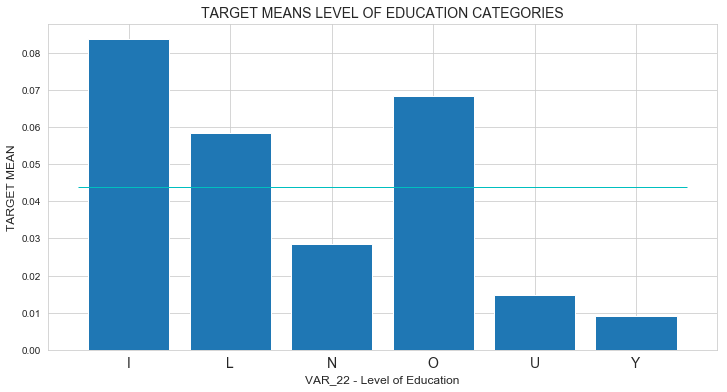

In [65]:
#%%     
label = df.groupby("VAR_22")["VAR_TARGET"].mean().index
means = df.groupby("VAR_22")["VAR_TARGET"].mean().values
index = np.arange(len(label))
plt.figure(figsize=(12, 6))
plt.bar(index, means)
plt.xlabel('VAR_22 - Level of Education', fontsize=12)
plt.ylabel('TARGET MEAN', fontsize=12)
plt.xticks(index, label, fontsize=14, rotation=0)
plt.title('TARGET MEANS LEVEL OF EDUCATION CATEGORIES',fontsize=14)
plt.hlines([df["VAR_TARGET"].mean()],-0.5,len(label)-0.5,color="c",linewidth=1)
plt.show()

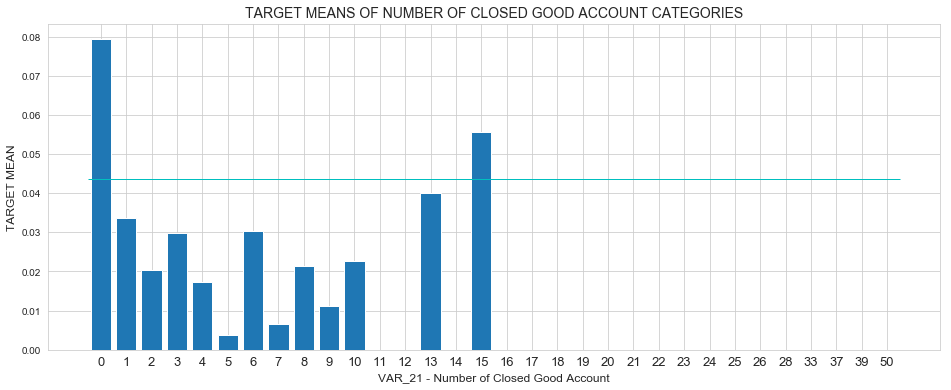

In [66]:
#%%
label = [int(label) for label in df.groupby("VAR_21")["VAR_TARGET"].mean().index]
means = df.groupby("VAR_21")["VAR_TARGET"].mean().values
index = np.arange(len(label))
plt.figure(figsize=(16, 6))
plt.bar(index, means)
plt.xlabel('VAR_21 - Number of Closed Good Account', fontsize=12)
plt.ylabel('TARGET MEAN', fontsize=12)
plt.xticks(index, label, fontsize=13, rotation=0)
plt.title('TARGET MEANS OF NUMBER OF CLOSED GOOD ACCOUNT CATEGORIES',fontsize=14)
plt.hlines([df["VAR_TARGET"].mean()],-0.5,len(label)-0.5,color="c",linewidth=1)
plt.show()

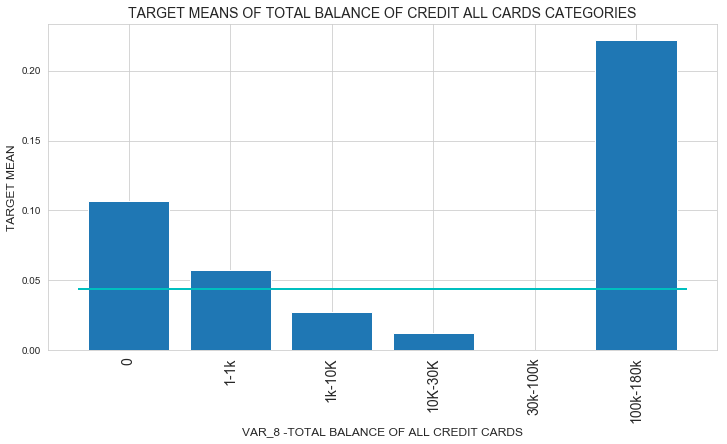

In [67]:
import matplotlib.pyplot as plt
import numpy as np
label = ["0","1-1k",'1k-10K','10K-30K','30k-100k','100k-180k']
means = [
        
        df[(df["VAR_8"]>-1)&(df["VAR_8"]<1)]["VAR_TARGET"].mean(),
        df[(df["VAR_8"]>1)&(df["VAR_8"]<1000)]["VAR_TARGET"].mean(),
        df[(df["VAR_8"]>1000)&(df["VAR_8"]<10000)]["VAR_TARGET"].mean(),
        df[(df["VAR_8"]>10000)&(df["VAR_8"]<30000)]["VAR_TARGET"].mean(),
        df[(df["VAR_8"]>30000)&(df["VAR_8"]<100000)]["VAR_TARGET"].mean(),
        df[(df["VAR_8"]>100000)&(df["VAR_8"]<180000)]["VAR_TARGET"].mean()]
plt.figure(figsize=(12, 6))
plt.hlines([df["VAR_TARGET"].mean()],-0.5,len(label)-0.5,color="c",linewidth=2)
index = np.arange(len(label))
plt.bar(index, means)
plt.xlabel('VAR_8 -TOTAL BALANCE OF ALL CREDIT CARDS', fontsize=12)
plt.ylabel('TARGET MEAN', fontsize=12)
plt.xticks(index, label, fontsize=14, rotation=90)
plt.title('TARGET MEANS OF TOTAL BALANCE OF CREDIT ALL CARDS CATEGORIES',fontsize=14)
plt.show()

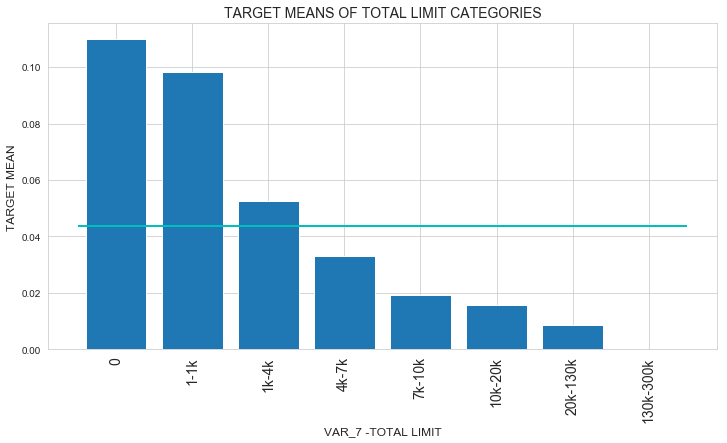

In [68]:
import matplotlib.pyplot as plt
import numpy as np
label = ["0","1-1k","1k-4k","4k-7k","7k-10k",'10k-20k','20k-130k','130k-300k']
means = [
        df[(df["VAR_7"]>-1)&(df["VAR_7"]<1)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>1)&(df["VAR_7"]<1000)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>1000)&(df["VAR_7"]<4000)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>4000)&(df["VAR_7"]<7000)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>7000)&(df["VAR_7"]<10000)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>10000)&(df["VAR_7"]<20000)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>20000)&(df["VAR_7"]<130000)]["VAR_TARGET"].mean(),
        df[(df["VAR_7"]>130000)&(df["VAR_7"]<310000)]["VAR_TARGET"].mean()]
plt.figure(figsize=(12, 6))
plt.hlines([df["VAR_TARGET"].mean()],-0.5,len(label)-0.5,color="c",linewidth=2)
index = np.arange(len(label))
plt.bar(index, means)
plt.xlabel('VAR_7 -TOTAL LIMIT', fontsize=12)
plt.ylabel('TARGET MEAN', fontsize=12)
plt.xticks(index, label, fontsize=14, rotation=90)
plt.title('TARGET MEANS OF TOTAL LIMIT CATEGORIES',fontsize=14)
plt.show()